# 1. Introduction

# 2. Data

In [644]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.manifold import TSNE
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [645]:
# Load data
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
#df = pd.read_csv('2018_Financial_Data.csv')
                   
# Drop rows with no information
df.dropna(how='all', inplace=True)
df.shape

(16744, 17)

# 3. Methodology

## Data Exploration

In [646]:
#df[df['rating'] == 'NaN']

In [647]:
df.IMDb.unique()

array([8.8, 8.7, 8.5, 8.4, 8.3, 8.2, 8.1, 8. , 7.7, 7.9, 7.8, 7.5, 7.6,
       7.4, 7.1, 7.2, 7.3, 7. , 6.8, 6.9, 6.6, 6.7, 6.5, 6.1, 6.4, 6.3,
       6.2, 5.6, 5.9, 5.8, 6. , 5.7, 5.4, 5. , 5.2, 5.3, 5.5, 5.1, 8.6,
       9.1, 4.7, 4.6, 4.8, 4.9, 4.4, 4.5, 9.3, 3.9, 4.1, 3.5, 4.3, 3.6,
       4.2, 3.8, nan, 4. , 3.4, 3.7, 2.6, 3.1, 3.2, 2.9, 2.5, 2.8, 3.3,
       1.6, 2.1, 2.2, 3. , 2.7, 2.3, 2.4, 1.7, 1.4, 9. , 0. , 8.9, 2. ,
       1.8, 1.9, 1. , 1.5, 1.3])

In [648]:
# max_value = 0
# for index,row in df.iterrows():
#     list_num=len(row['Genres'])
#     if list_num > max_value:
#         max_value = list_num
    
# max_value
#    # print(row['listed_in'])

In [649]:
#df = pd.read_csv("netflix_titles.csv")
df.head(20)

Unnamed: 0  ID                               Title  Year  Age  IMDb  \
0            0   1                           Inception  2010  13+   8.8   
1            1   2                          The Matrix  1999  18+   8.7   
2            2   3              Avengers: Infinity War  2018  13+   8.5   
3            3   4                  Back to the Future  1985   7+   8.5   
4            4   5      The Good, the Bad and the Ugly  1966  18+   8.8   
5            5   6   Spider-Man: Into the Spider-Verse  2018   7+   8.4   
6            6   7                         The Pianist  2002  18+   8.5   
7            7   8                    Django Unchained  2012  18+   8.4   
8            8   9             Raiders of the Lost Ark  1981   7+   8.4   
9            9  10                Inglourious Basterds  2009  18+   8.3   
10          10  11                         Taxi Driver  1976  18+   8.3   
11          11  12                            3 Idiots  2009  13+   8.4   
12          12  13                     Pan's Labyrinth  2006  18+   8.2   
13          13  14                                Room  2015  18+   8.1   
14          14  15     Monty Python and the Holy Grail  1975   7+   8.2   
15          15  16        Once Upon a Time in the West  1968  13+   8.5   
16          16  17  Indiana Jones and the Last Crusade  1989  13+   8.2   
17          17  18                       Groundhog Day  1993   7+   8.0   
18          18  19                   The King's Speech  2010  18+   8.0   
19          19  20                                 Her  2013  18+   8.0   

   Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0              87%        1     0            0        0     0   
1              87%        1     0            0        0     0   
2              84%        1     0            0        0     0   
3              96%        1     0            0        0     0   
4              97%        1     0            1        0     0   
5              97%        1     0            0        0     0   
6              95%        1     0            1        0     0   
7              87%        1     0            0        0     0   
8              95%        1     0            0        0     0   
9              89%        1     0            0        0     0   
10             95%        1     0            0        0     0   
11            100%        1     0            1        0     0   
12             95%        1     0            0        0     0   
13             93%        1     0            0        0     0   
14             97%        1     0            0        0     0   
15             95%        1     0            1        0     0   
16             88%        1     0            0        0     0   
17             96%        1     0            0        0     0   
18             95%        1     0            0        0     0   
19             95%        1     0            0        0     0   

                                      Directors  \
0                             Christopher Nolan   
1                Lana Wachowski,Lilly Wachowski   
2                       Anthony Russo,Joe Russo   
3                               Robert Zemeckis   
4                                  Sergio Leone   
5   Bob Persichetti,Peter Ramsey,Rodney Rothman   
6                                Roman Polanski   
7                             Quentin Tarantino   
8                              Steven Spielberg   
9                             Quentin Tarantino   
10                              Martin Scorsese   
11                              Rajkumar Hirani   
12                           Guillermo del Toro   
13                             Lenny Abrahamson   
14                    Terry Gilliam,Terry Jones   
15                                 Sergio Leone   
16                             Steven Spielberg   
17                                 Harold Ramis   
18                                   Tom Hooper   
19                                  Spike 

In [650]:
# Get info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

As displayed above, there are few missing values in different columns. We will have to look at those in order to proceed.

The dataset has 16744 rows and 16 columns:

ID: unique id of each show (not much of a use for us in this notebook)

Title: Name of the show

Year: Release year of the show

Age

IMDb Show ratingg

Rotten Tomatoes 

Netflix

Hulu 

Disney+  

Type: The category of a show, can be either a Movie or a TV Show

Directors: Name of the director(s) of the show

Genres: Genre of the show

Country: Name of countries the show was masde

Language

Runtime: Time duration of the show

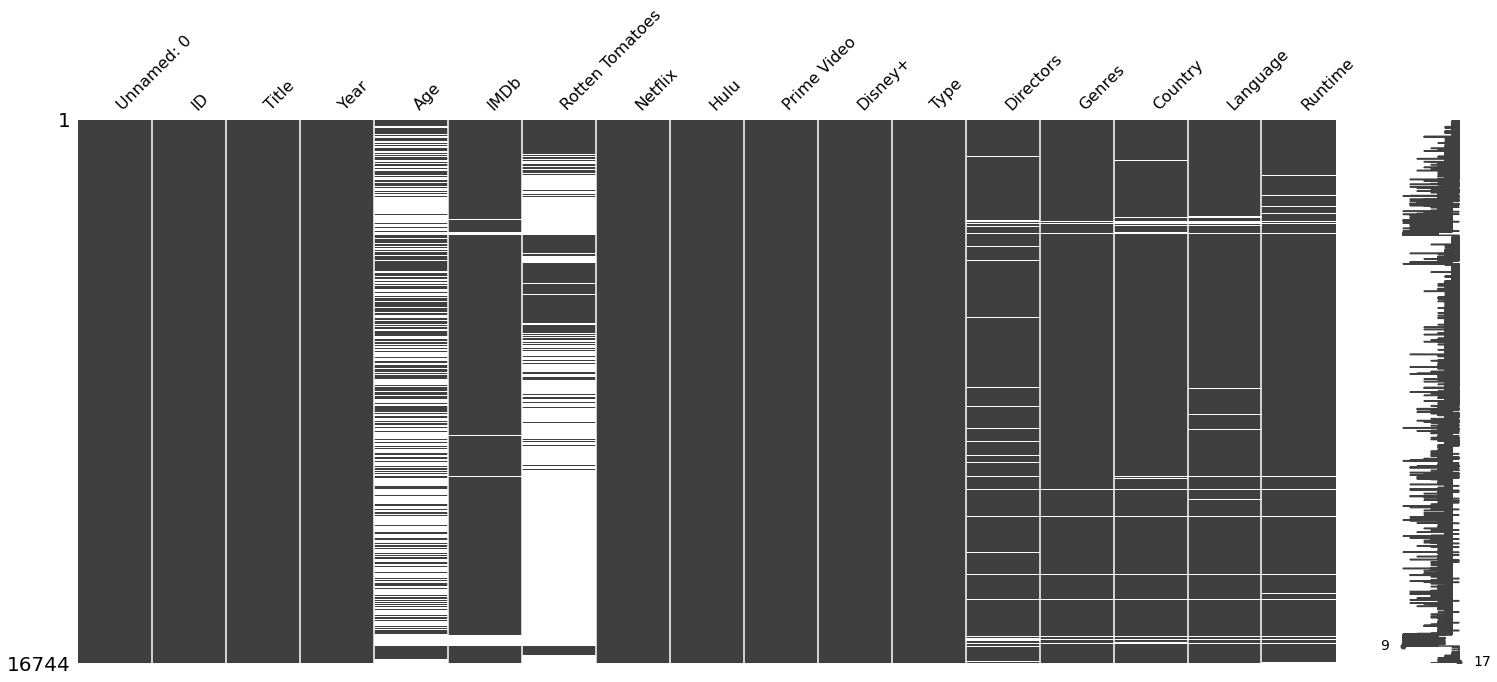

In [651]:
# Visualize missing values as a matrix 
msno.matrix(df)

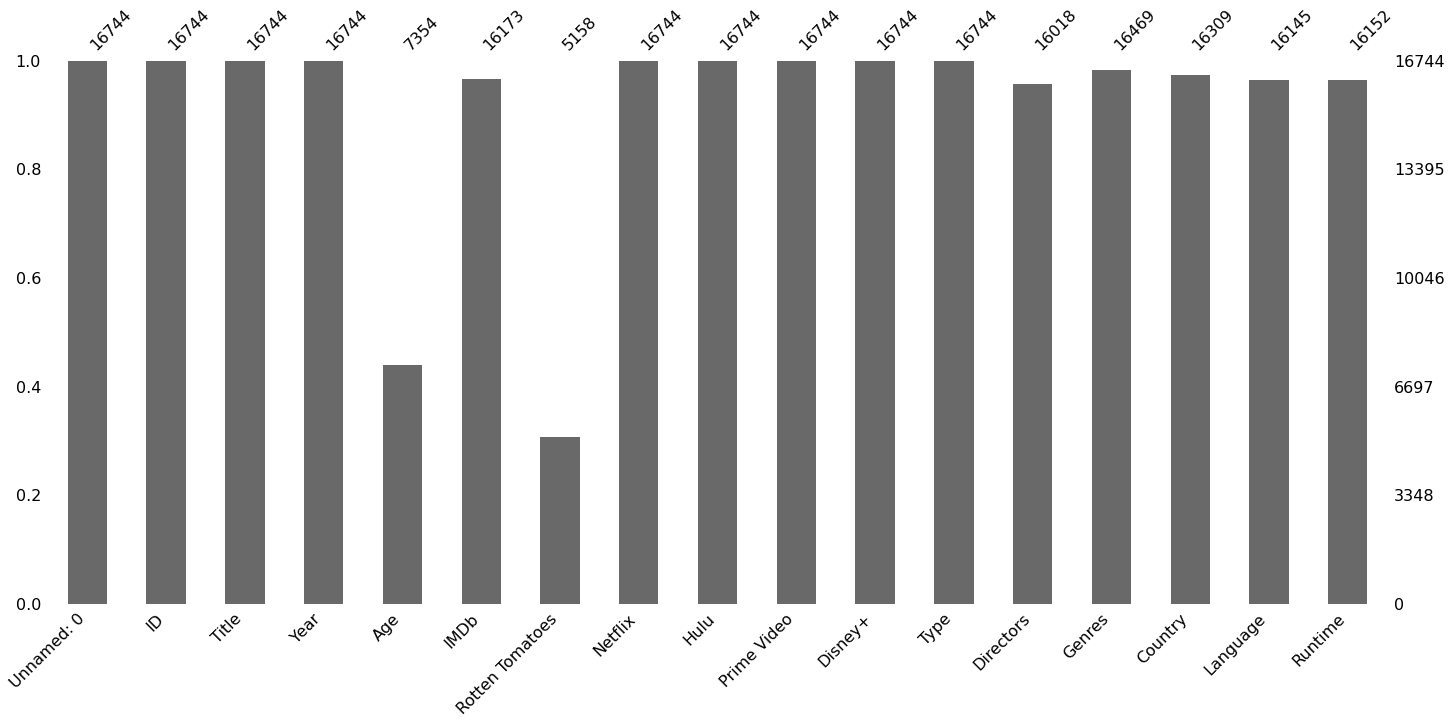

In [652]:
#Let's find out missing value count using Bar chart 
msno.bar(df)

Director, cast and country has lot of variation which indicates there are missing values in these columns.

## Data Cleaning

In [653]:
df.dropna(subset = ["Age","IMDb","Runtime"], inplace=True)
df['Age'] = df['Age'].replace('all', 0) 

In [654]:
#Let's see how many unique values are there
X1.nunique()

Year        98
Age          5
IMDb        78
Runtime    199
dtype: int64

In [655]:
#Count of missing values.
df.isna().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                   0
IMDb                  0
Rotten Tomatoes    3882
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
Directors           118
Genres                6
Country              33
Language             64
Runtime               0
dtype: int64

In [656]:
# #Let's plot what words are common from the description.

# from wordcloud import WordCloud
# def plot_wordcloud(msg):
#     plt.figure(figsize=(8,8))
#     wordcloud = WordCloud(max_font_size=120, background_color = 'white').generate(", ".join(msg))
#     plt.imshow(wordcloud, interpolation = 'bilinear')
#     plt.axis('off')
#     plt.show()

    
# plot_wordcloud(df['Country'])

In [657]:
df=df.drop(['Netflix','Hulu','Prime Video','Disney+','Unnamed: 0','ID','Type','Directors','Rotten Tomatoes'], axis=1)
df.head()

Title  Year  Age  IMDb  \
0                       Inception  2010  13+   8.8   
1                      The Matrix  1999  18+   8.7   
2          Avengers: Infinity War  2018  13+   8.5   
3              Back to the Future  1985   7+   8.5   
4  The Good, the Bad and the Ugly  1966  18+   8.8   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

In [658]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('+', ''))
    return(x)

In [659]:
df['Age'] = df['Age'].apply(clean_currency).astype('float')

In [660]:
# # One-hot encoding

# df1 = pd.concat([df, pd.get_dummies(df["IMDb"])], axis=1)

df.head()

Title  Year   Age  IMDb  \
0                       Inception  2010  13.0   8.8   
1                      The Matrix  1999  18.0   8.7   
2          Avengers: Infinity War  2018  13.0   8.5   
3              Back to the Future  1985   7.0   8.5   
4  The Good, the Bad and the Ugly  1966  18.0   8.8   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

## Feature engineering
In this step, I will apply statistics and visualization techniques to gain a better understanding of the dataset.

In [661]:
# Get univariate statistics to 
# summarize the central tendency, dispersion, 
# and shape of a dataset’s distribution

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7234 entries, 0 to 16740
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     7234 non-null   object 
 1   Year      7234 non-null   int64  
 2   Age       7234 non-null   float64
 3   IMDb      7234 non-null   float64
 4   Genres    7228 non-null   object 
 5   Country   7201 non-null   object 
 6   Language  7170 non-null   object 
 7   Runtime   7234 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 508.6+ KB


## Treating Outliers

In [662]:
# Define the features and the outcome
print(df.shape)
X1 = df.dropna(how='all')
X1 = df.drop(["Genres", "Country", "Language","Title"], 1)

X1.shape

temp = df.dropna(how='all')
temp = df.drop(["Genres", "Country", "Language","Title","Year"], 1)
print(temp.shape)
temp.head()
#X1=X1.dropna([5887],axis=1)
#temp=temp.drop(temp.index[5887])

(7234, 8)
(7234, 3)


Age  IMDb  Runtime
0  13.0   8.8    148.0
1  18.0   8.7    136.0
2  13.0   8.5    149.0
3   7.0   8.5    116.0
4  18.0   8.8    161.0

In [663]:
X1.dropna()
print(X1.shape)
X1.head()

(7234, 4)


Year   Age  IMDb  Runtime
0  2010  13.0   8.8    148.0
1  1999  18.0   8.7    136.0
2  2018  13.0   8.5    149.0
3  1985   7.0   8.5    116.0
4  1966  18.0   8.8    161.0

In [664]:
#X1=X1.dropna([5887],axis=1)
X1=X1.drop(X1.index[5887])

In [665]:
for x in X1.columns[3:4]:
    
    for idx, y in enumerate(X1[x]):  
            if y > 1200:
                print(x)
                print(y)
                print(idx)

In [666]:
X1.describe()

Year          Age         IMDb      Runtime
count  7233.000000  7233.000000  7233.000000  7233.000000
mean   2004.299461    12.835615     5.850491    96.848887
std      15.832570     6.208797     1.336069    23.350665
min    1902.000000     0.000000     1.000000     2.000000
25%    1999.000000     7.000000     5.000000    87.000000
50%    2010.000000    16.000000     6.000000    94.000000
75%    2015.000000    18.000000     6.800000   106.000000
max    2020.000000    18.000000     9.100000   360.000000

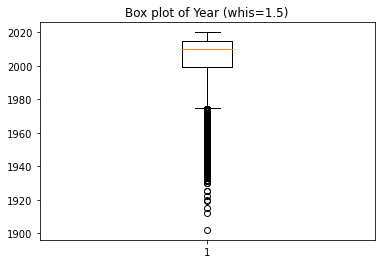

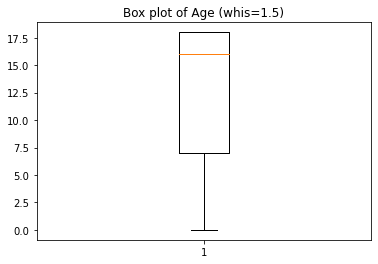

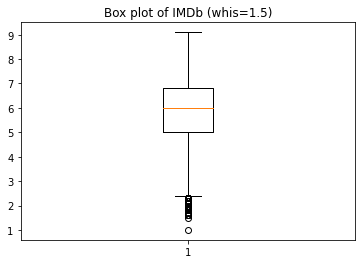

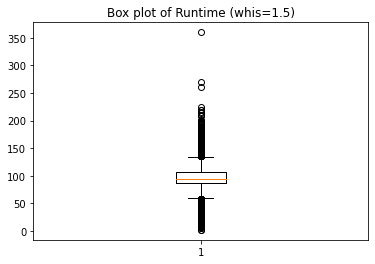

In [667]:
# Plot Box plots of the variables

plt.boxplot(X1["Year"])
plt.title("Box plot of Year (whis=1.5)")
plt.show()

plt.boxplot(X1["Age"])
plt.title("Box plot of Age (whis=1.5)")
plt.show()

plt.boxplot(X1["IMDb"])
plt.title("Box plot of IMDb (whis=1.5)")
plt.show()

plt.boxplot(X1["Runtime"])
plt.title("Box plot of Runtime (whis=1.5)")
plt.show()

In [668]:
# # Standarizing the features

# scaler = StandardScaler()
# temp_std = scaler.fit_transform(temp)

# # Defining the k-means

# kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# # Fit model

# %timeit kmeans_cluster.fit(temp)
# y_pred = kmeans_cluster.predict(temp)

# # Apply PCA

# pca = PCA(n_components=3).fit_transform(temp_std)

# # Plot the solution

# plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
# plt.show()

In [669]:
# Standarizing the features

scaler = StandardScaler()
X_std = scaler.fit_transform(X1)


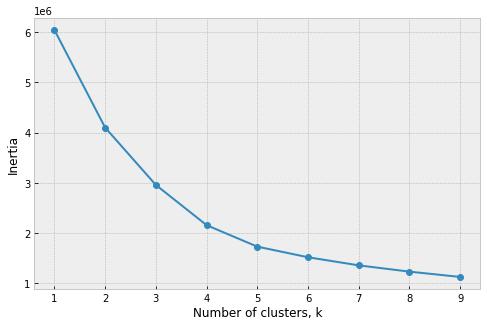

In [670]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X1)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [619]:
# Defining the k-means

kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model

%timeit kmeans_cluster.fit(X1)
y_pred = kmeans_cluster.predict(X1)

72.5 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


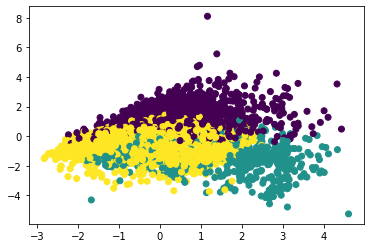

In [620]:
# Apply PCA

pca = PCA(n_components=2).fit_transform(X_std)

# Plot the solution

plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

In [621]:
cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

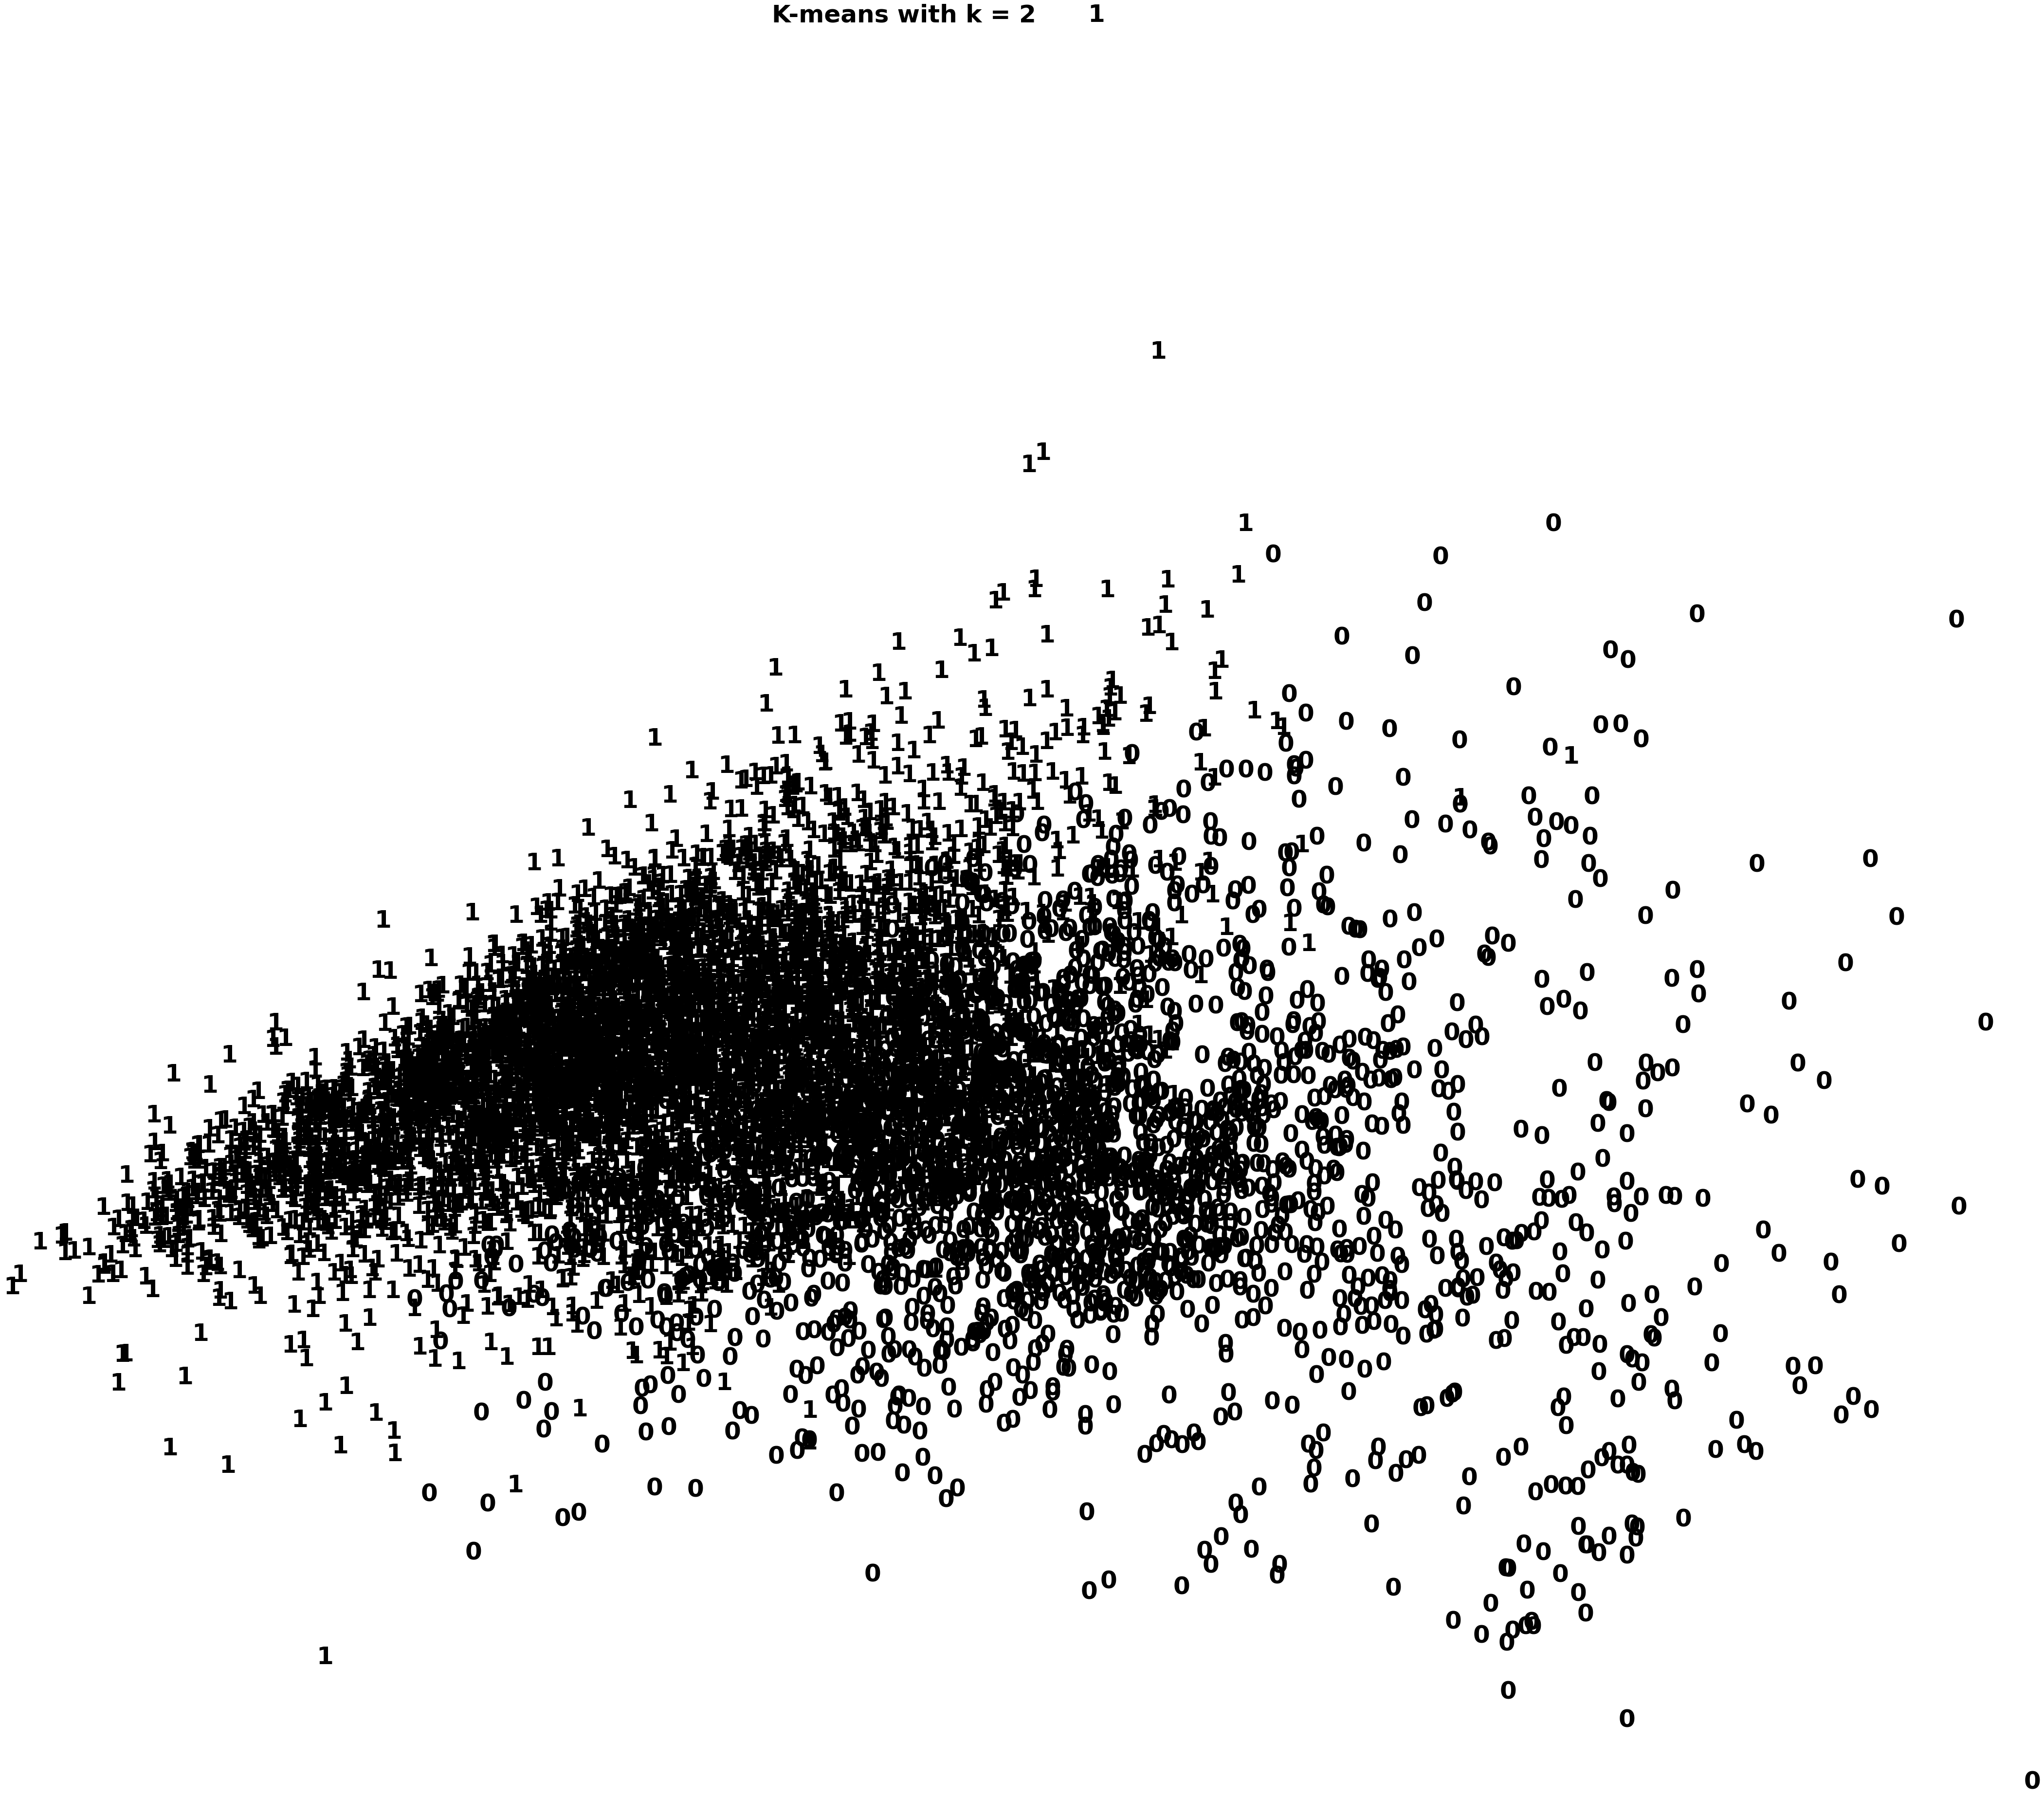

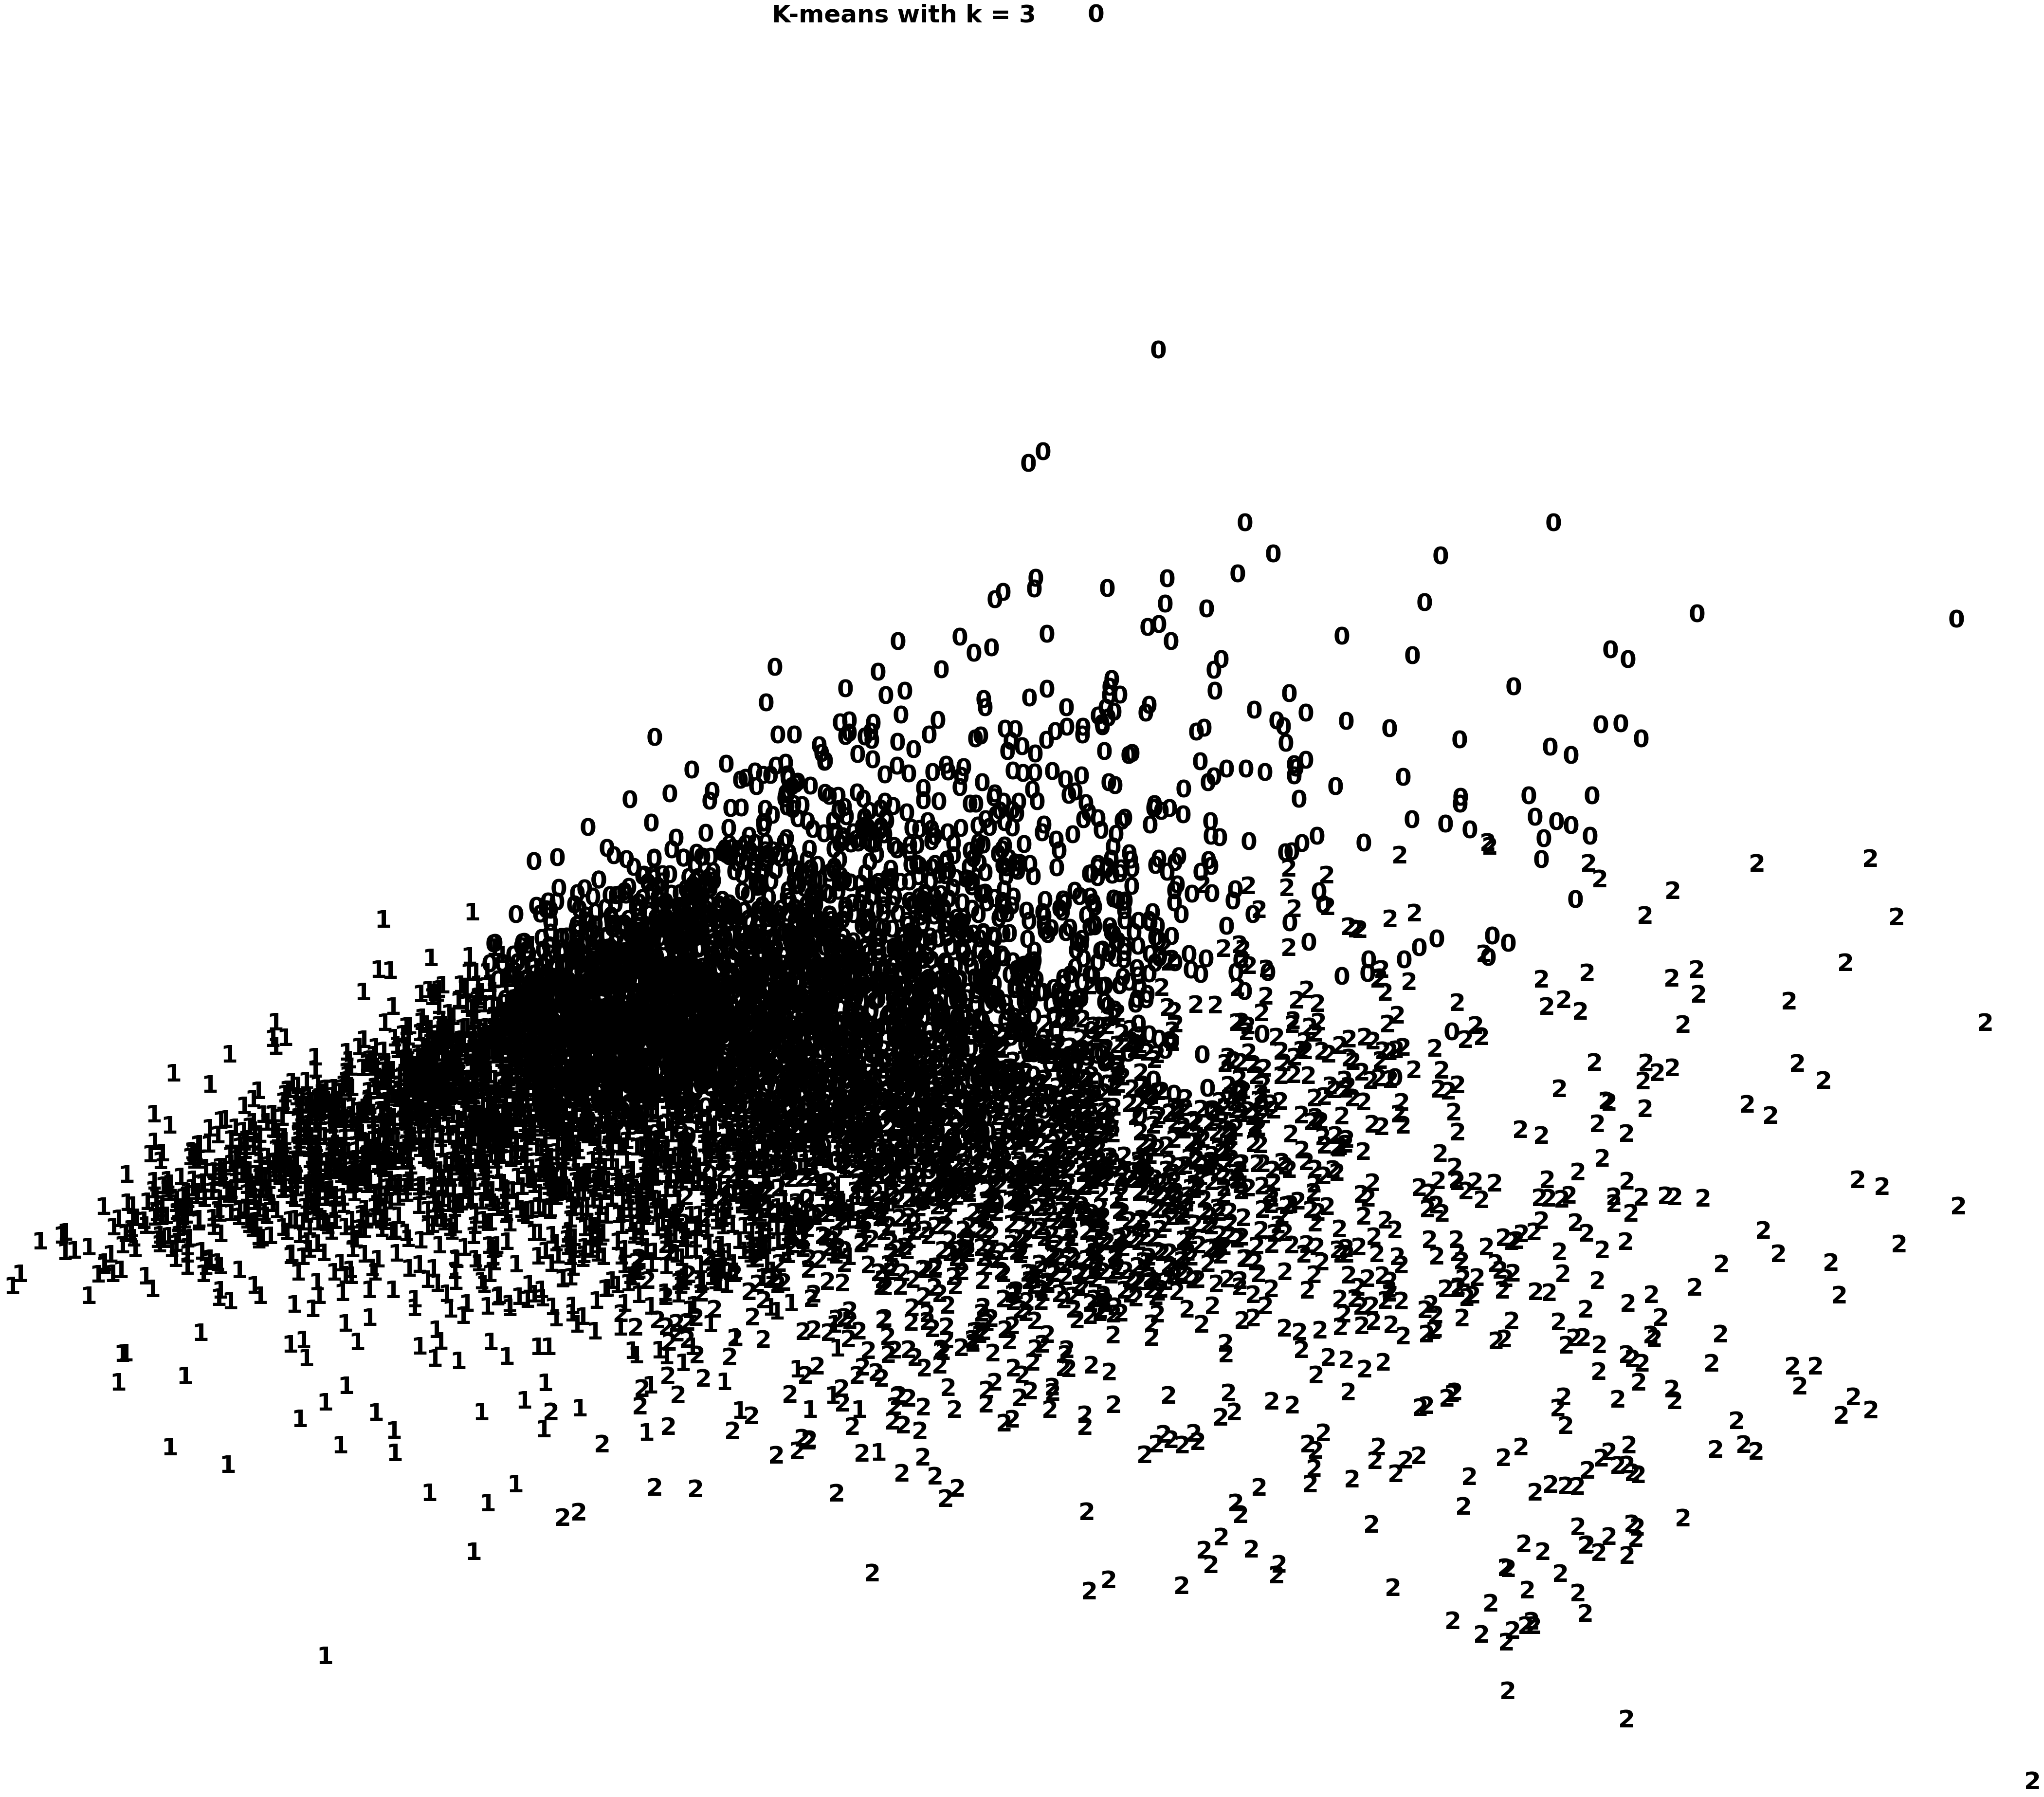

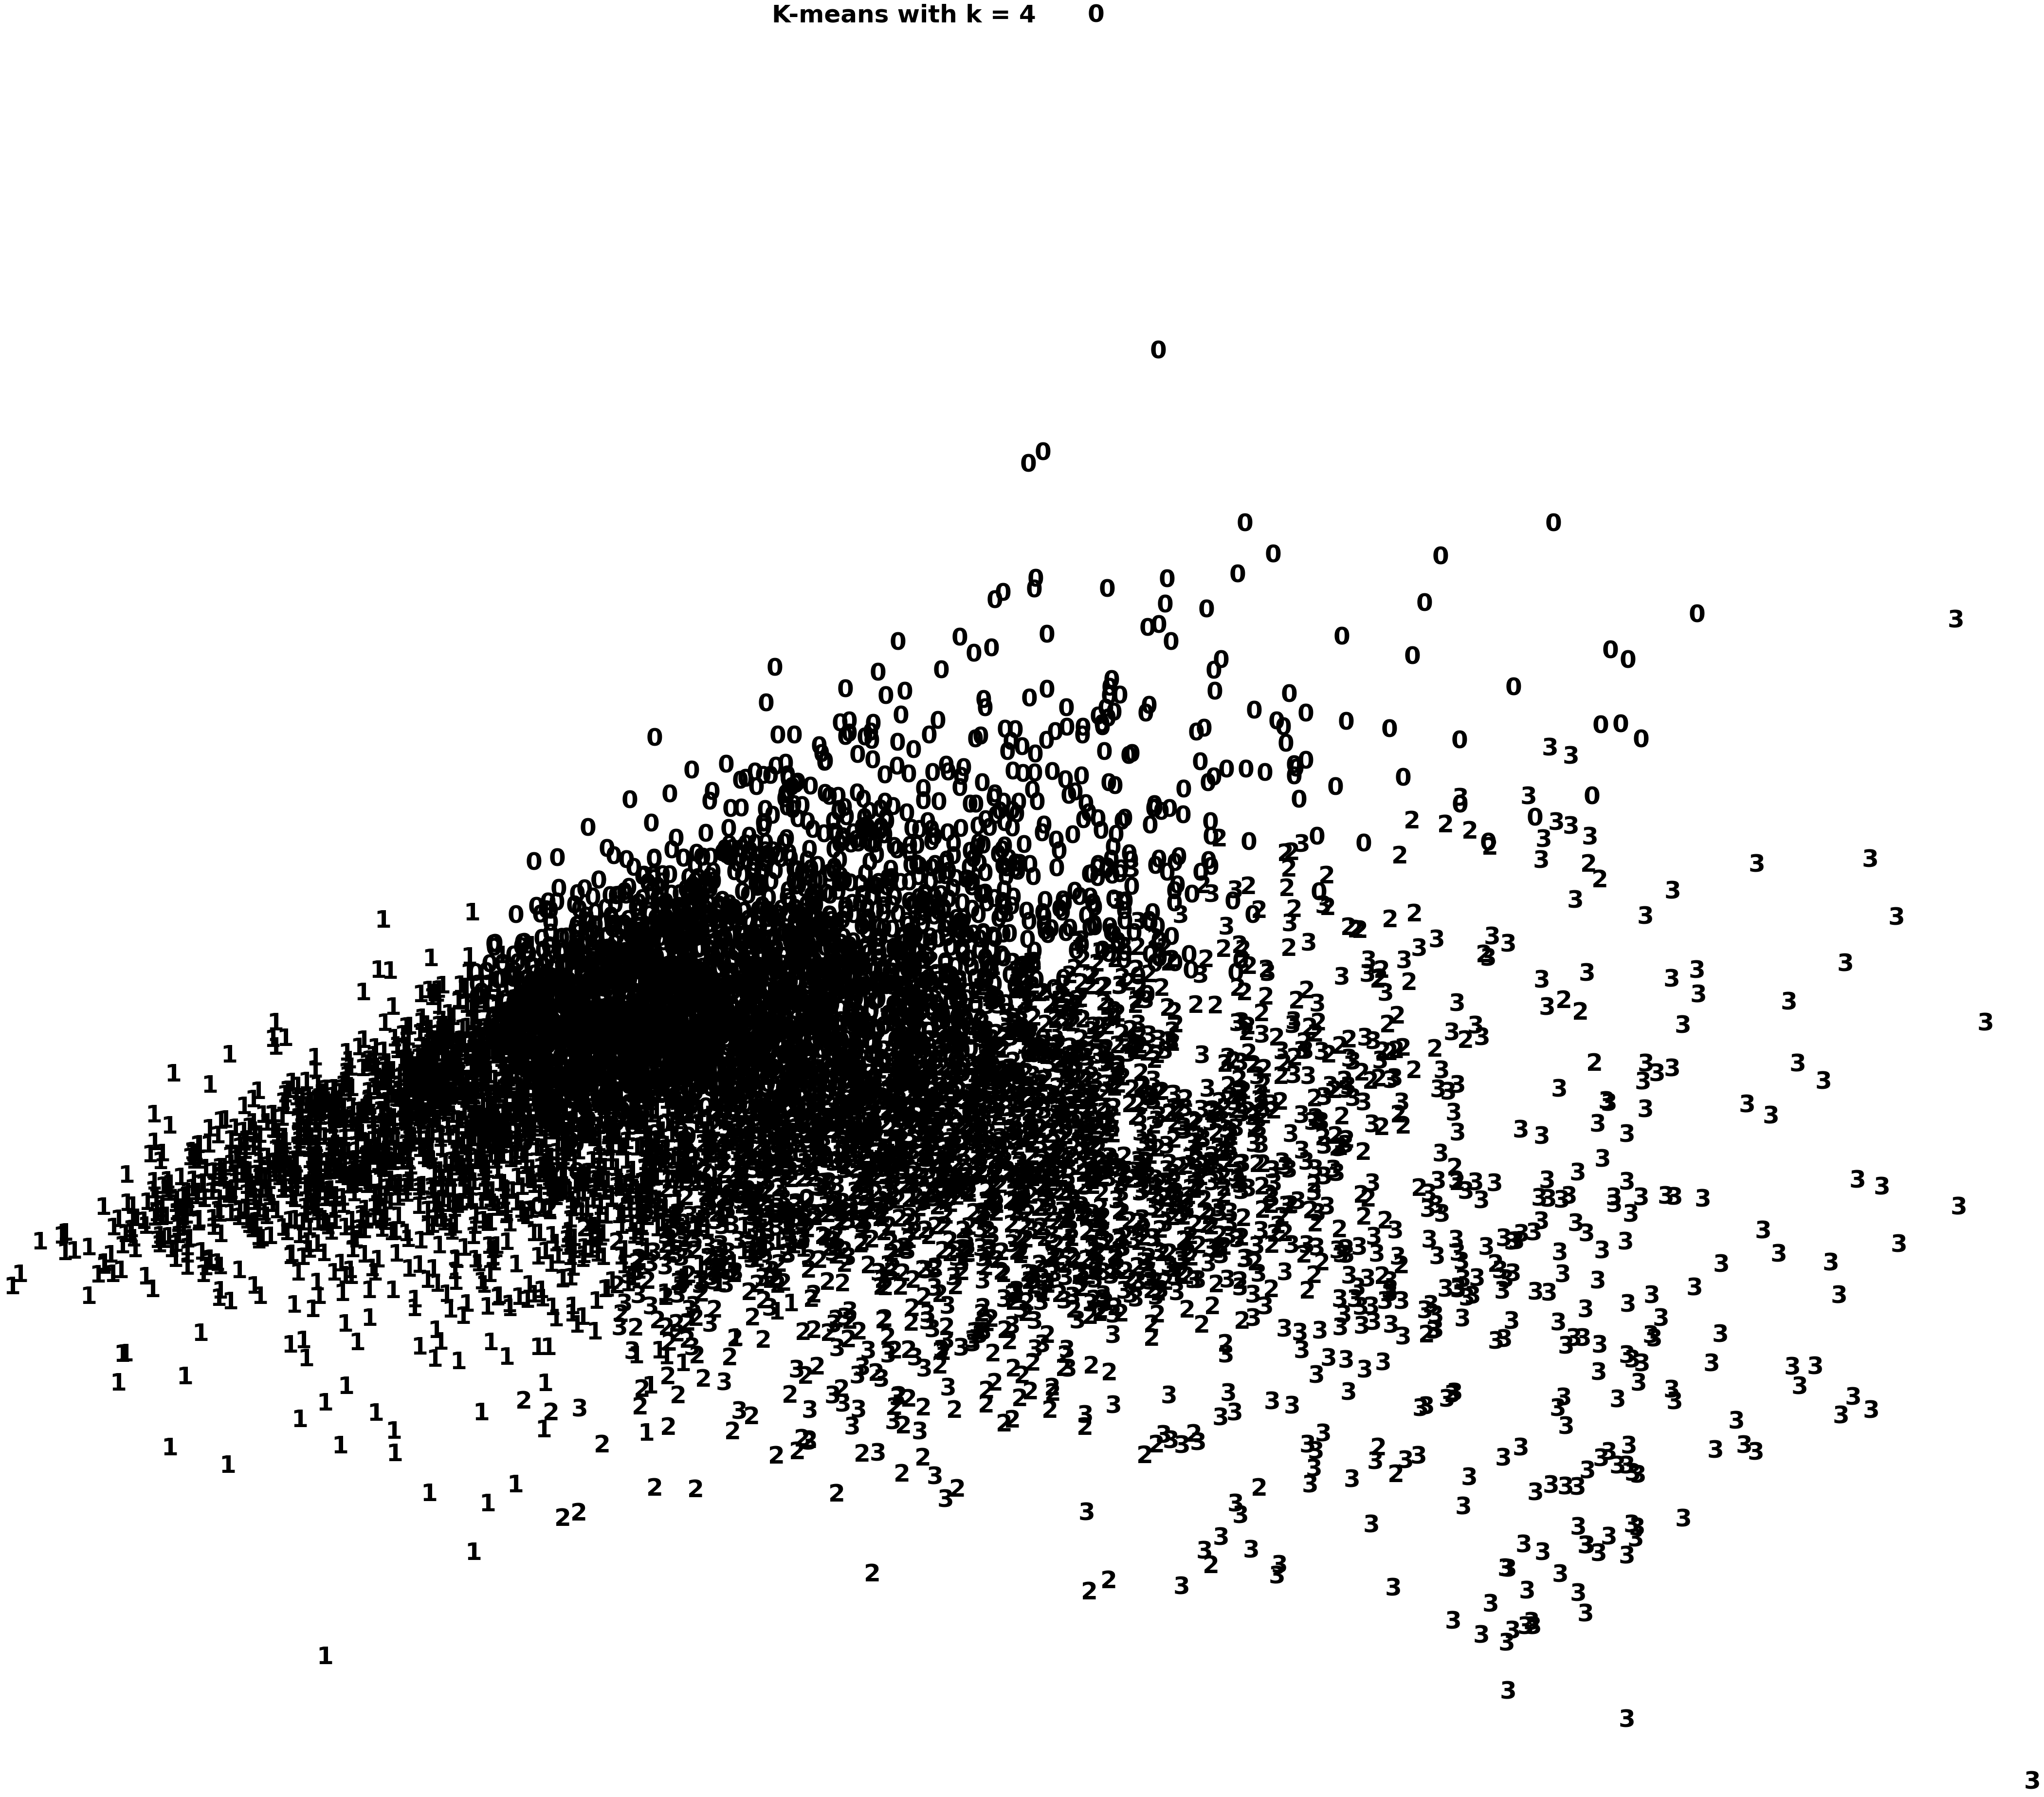

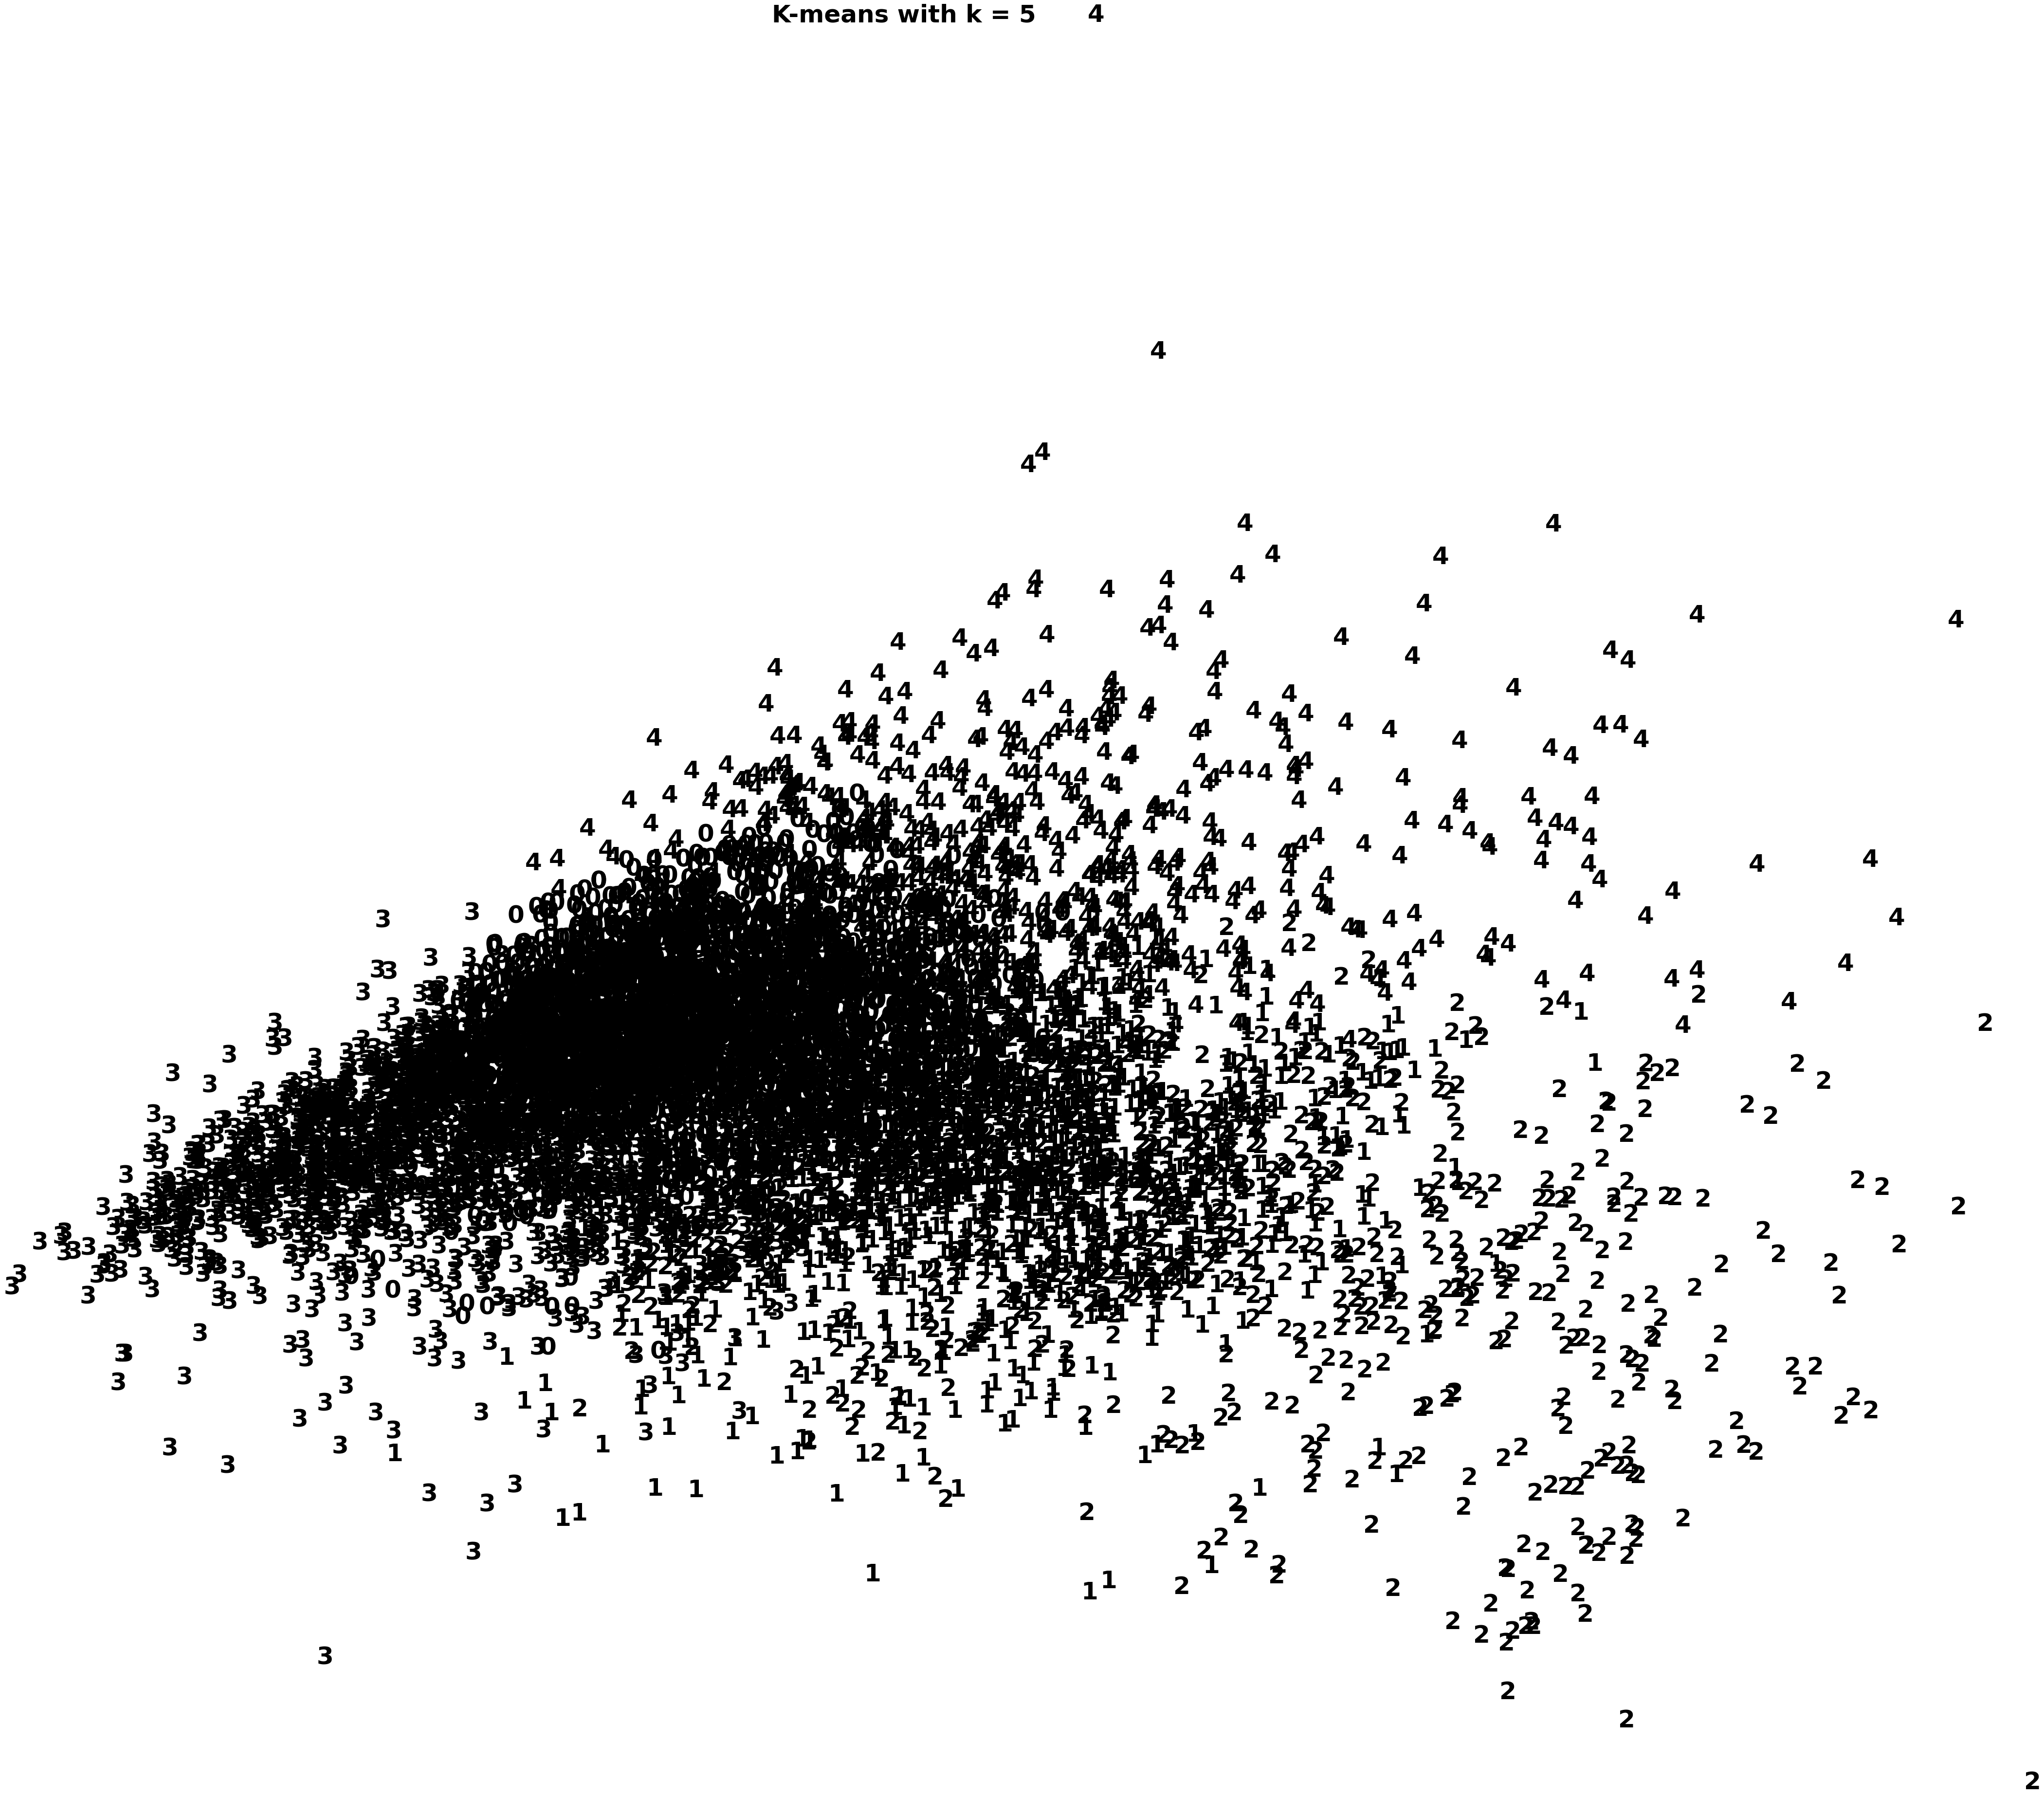

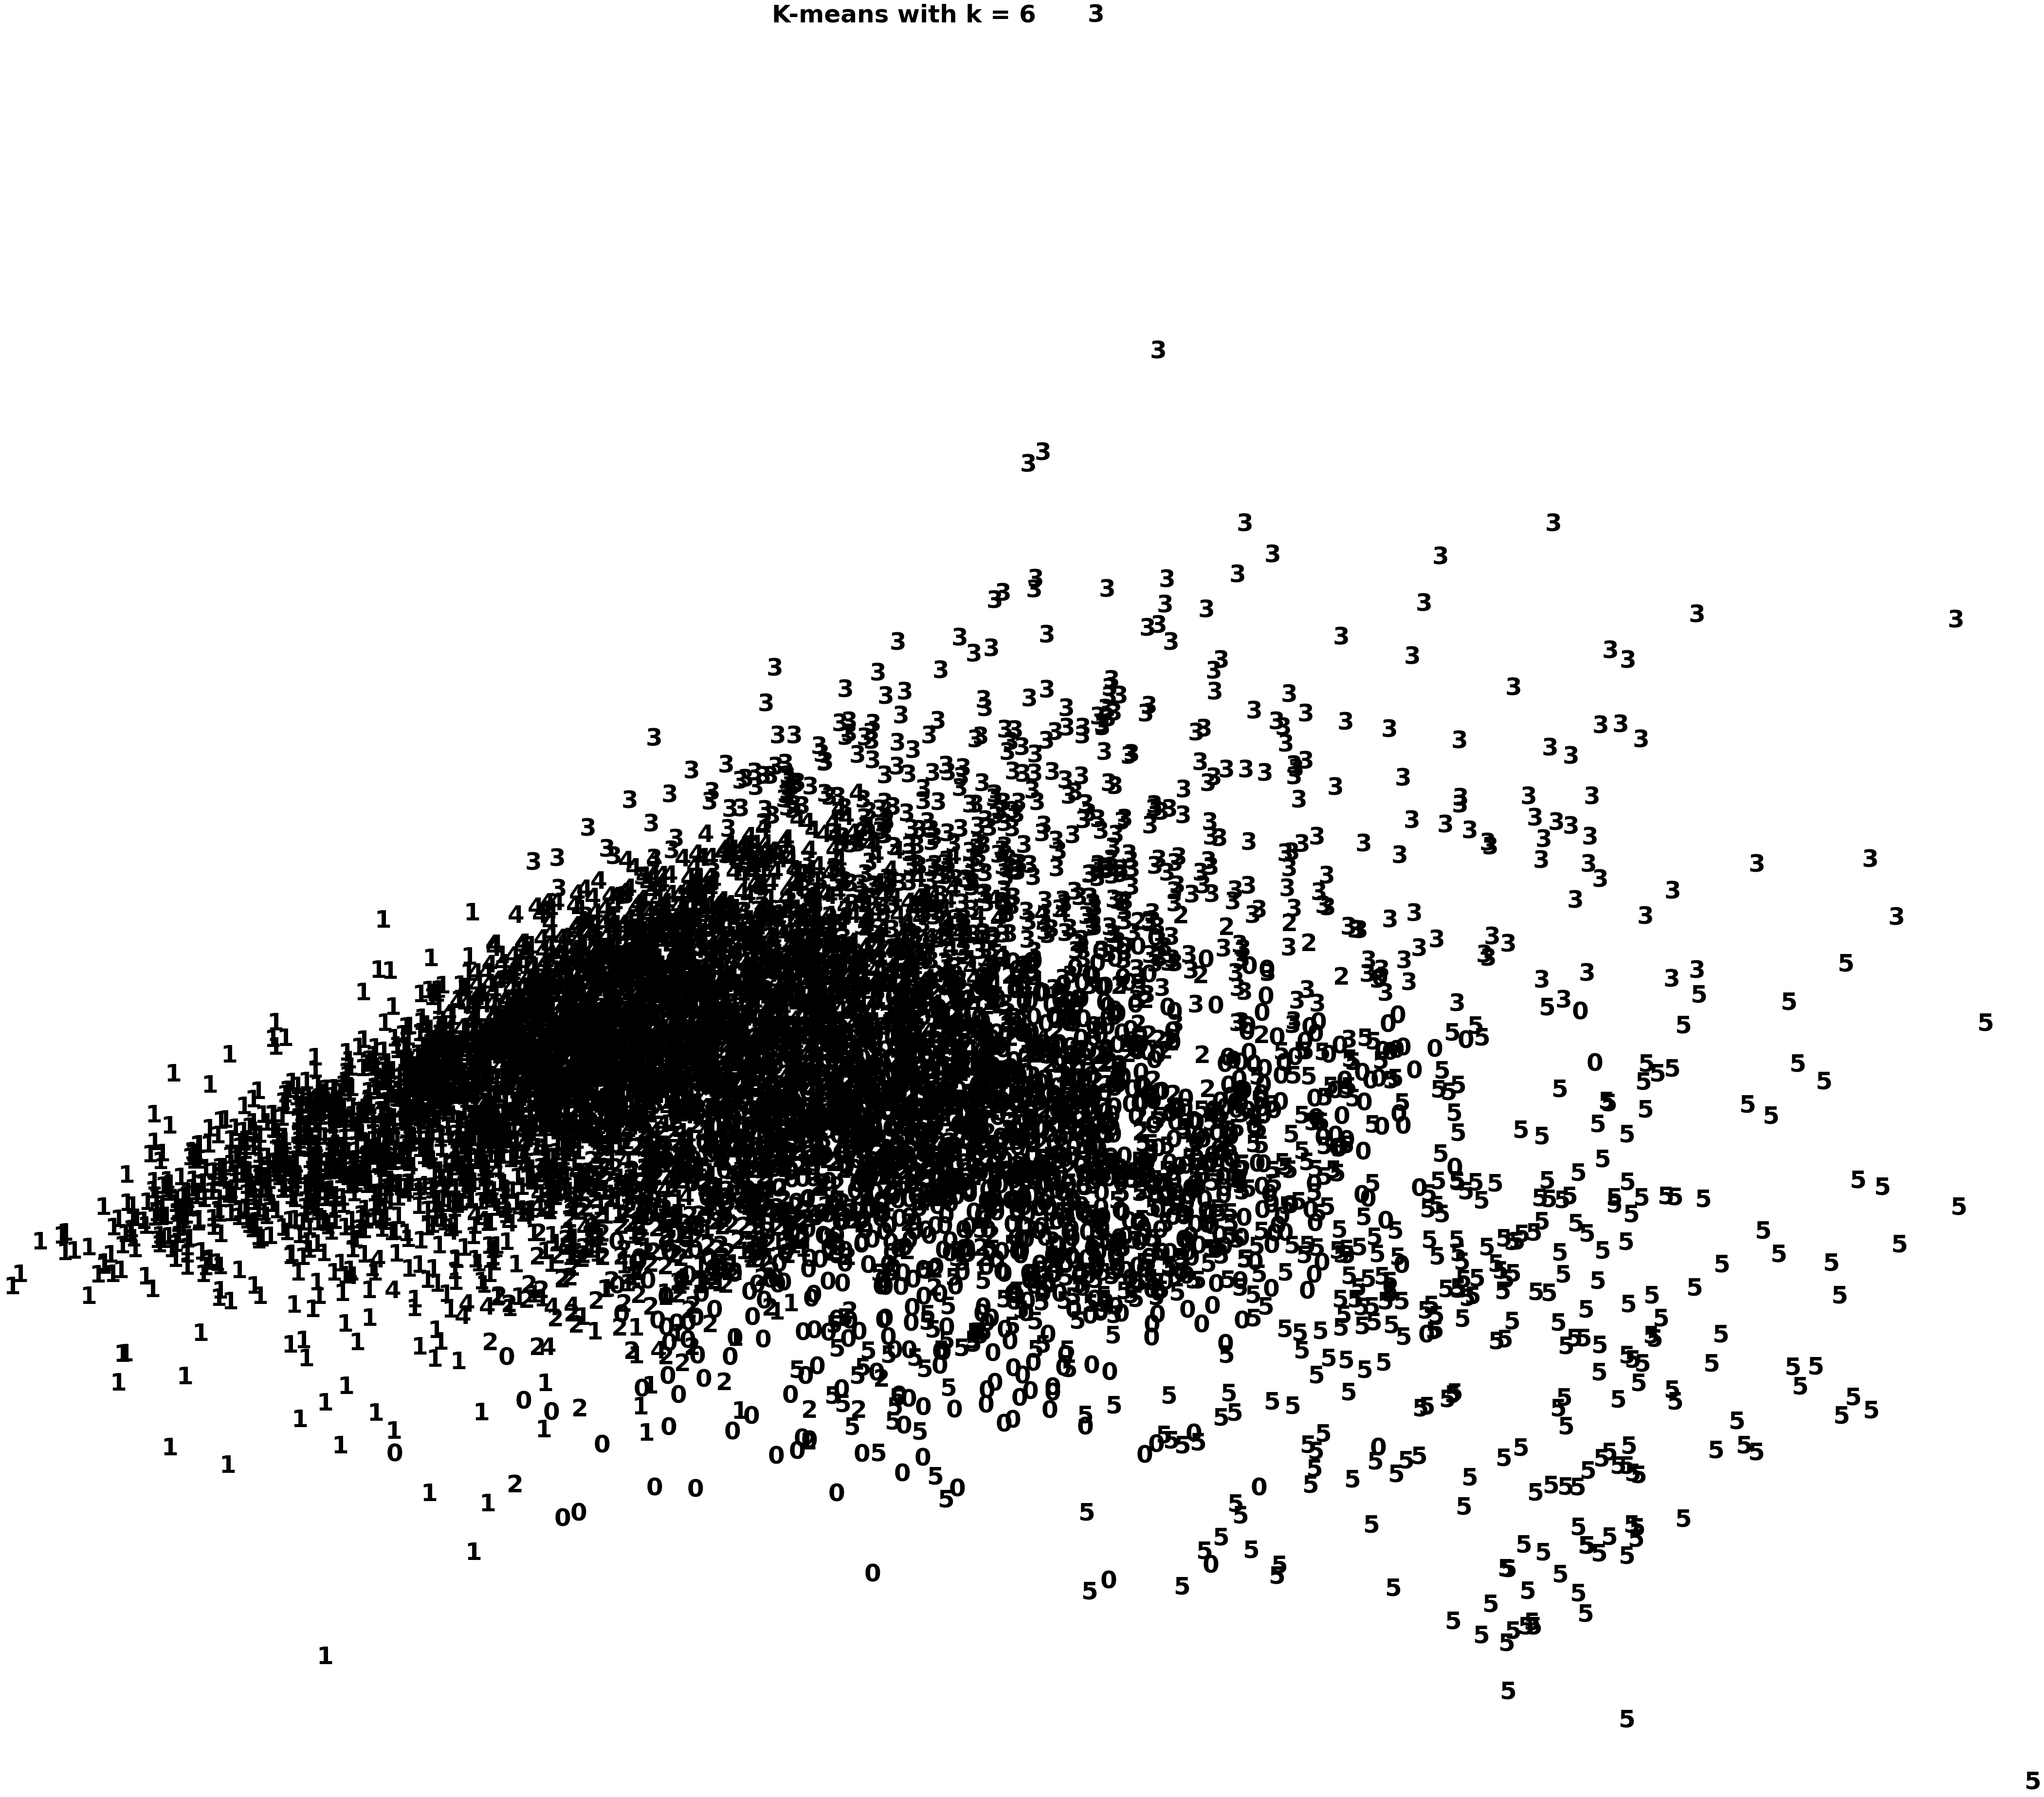

In [622]:

pca = PCA(n_components=3).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 #color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [623]:
# Change the value of k and evaluate the performance of K-means

pred_1 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

pred_2 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

pred_3 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

pred_4 = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)

pred_5 = KMeans(n_clusters=6, random_state=123).fit_predict(X_std)

pred_6 = KMeans(n_clusters=7, random_state=123).fit_predict(X_std)

pred_7 = KMeans(n_clusters=8, random_state=123).fit_predict(X_std)

pred_8 = KMeans(n_clusters=9, random_state=123).fit_predict(X_std)

pred_9 = KMeans(n_clusters=10, random_state=123).fit_predict(X_std)

pred_10 = KMeans(n_clusters=11, random_state=123).fit_predict(X_std)

# Calculate the silhouette coefficient scores

print("Silhouette score for 2 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_1, metric='euclidean')))
print("Silhouette score for 3 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("Silhouette score for 4 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette score for 5 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("Silhouette score for 6 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_5, metric='euclidean')))
print("Silhouette score for 7 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_6, metric='euclidean')))
print("Silhouette score for 8 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_7, metric='euclidean')))
print("Silhouette score for 9 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_8, metric='euclidean')))
print("Silhouette score for 10 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_9, metric='euclidean')))
print("Silhouette score for 11 clusters k-means: {}".format(metrics.silhouette_score(X_std, pred_10, metric='euclidean')))

Silhouette score for 2 clusters k-means: 0.2853896667986714
Silhouette score for 3 clusters k-means: 0.22877992605070763
Silhouette score for 4 clusters k-means: 0.2601035018367642
Silhouette score for 5 clusters k-means: 0.2702586734784724
Silhouette score for 6 clusters k-means: 0.28208201247706555
Silhouette score for 7 clusters k-means: 0.29213892351848963
Silhouette score for 8 clusters k-means: 0.24544376487537456
Silhouette score for 9 clusters k-means: 0.24442773108153493
Silhouette score for 10 clusters k-means: 0.2474914413494488
Silhouette score for 11 clusters k-means: 0.2549428702299967


2 clusters k-means


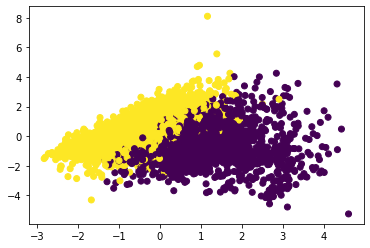

3 clusters k-means


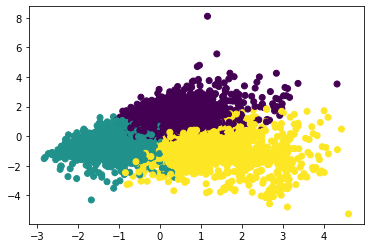

4 clusters k-means


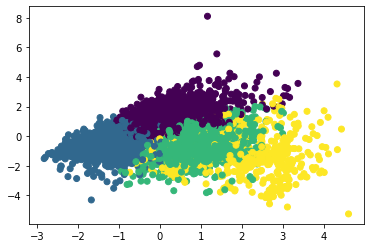

5 clusters k-means


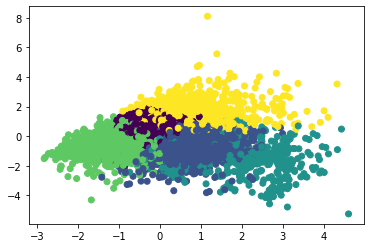

6 clusters k-means


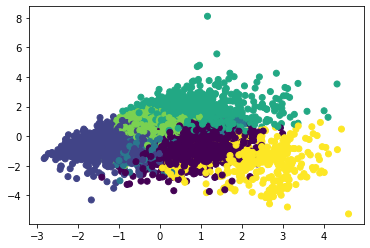

7 clusters k-means


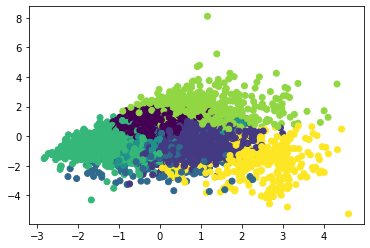

8 clusters k-means


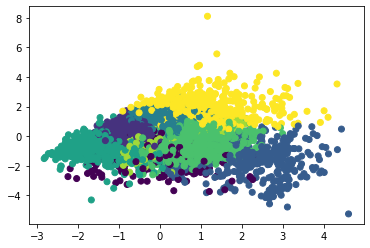

9 clusters k-means


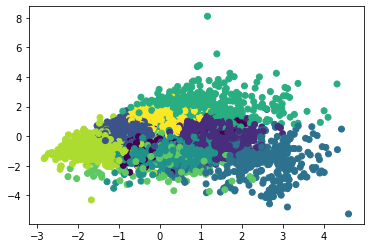

10 clusters k-means


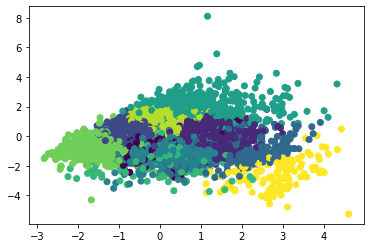

11 clusters k-means


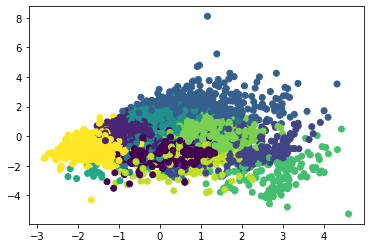

In [624]:
# Plot the solutions

print("2 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_1)
plt.show()

print("3 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_2)
plt.show()

print("4 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_3)
plt.show()

print("5 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_4)
plt.show()

print("6 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_5)
plt.show()

print("7 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_6)
plt.show()

print("8 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_7)
plt.show()

print("9 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_8)
plt.show()

print("10 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_9)
plt.show()

print("11 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_10)
plt.show()

According to the results, the best solution is the K-means model with 2 and 7 clusters since its silhouette score is the highest. In addition, its plot seems to capture the correct grouping in the data.

Moreover, from the plots it can be seen that when k is greater than 4; the algorithm produced some incorrectly assigned solutions.

## Mini-Batch K-Means

29.5 ms ± 4.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


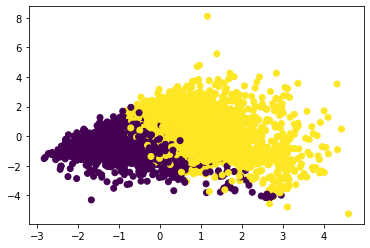

In [625]:
# Defining the mini-batch k-means

minikmeans_cluster = MiniBatchKMeans(init="random", n_clusters=2, batch_size=50)

# Fit model

%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

# Apply PCA

X_pca = PCA(n_components=2).fit_transform(X_std)

# Plot the solution

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=minikmeans_cluster)
plt.show()


In [626]:

# Change the value of k and evaluate the performance of Mini-Batch K-means

pred_1 = MiniBatchKMeans(init="random", n_clusters=2, batch_size=50).fit_predict(X_std)

pred_2 = MiniBatchKMeans(init="random", n_clusters=3, batch_size=50).fit_predict(X_std)

pred_3 = MiniBatchKMeans(init="random", n_clusters=4, batch_size=50).fit_predict(X_std)

pred_4 = MiniBatchKMeans(init="random", n_clusters=5, batch_size=50).fit_predict(X_std)

pred_5 = MiniBatchKMeans(init="random", n_clusters=6, batch_size=50).fit_predict(X_std)

pred_6 = MiniBatchKMeans(init="random", n_clusters=7, batch_size=50).fit_predict(X_std)

pred_7 = MiniBatchKMeans(init="random", n_clusters=8, batch_size=50).fit_predict(X_std)

pred_8 = MiniBatchKMeans(init="random", n_clusters=9, batch_size=50).fit_predict(X_std)

pred_9 = MiniBatchKMeans(init="random", n_clusters=10, batch_size=50).fit_predict(X_std)

pred_10 = MiniBatchKMeans(init="random", n_clusters=11, batch_size=50).fit_predict(X_std)

# Calculate the silhouette coefficient scores

print("Silhouette score for 2 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_1, metric='euclidean')))
print("Silhouette score for 3 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("Silhouette score for 4 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette score for 5 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("Silhouette score for 6 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_5, metric='euclidean')))
print("Silhouette score for 7 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_6, metric='euclidean')))
print("Silhouette score for 8 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_7, metric='euclidean')))
print("Silhouette score for 9 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_8, metric='euclidean')))
print("Silhouette score for 10 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_9, metric='euclidean')))
print("Silhouette score for 11 clusters mini-batch k-means: {}".format(metrics.silhouette_score(X_std, pred_10, metric='euclidean')))

Silhouette score for 2 clusters mini-batch k-means: 0.2858872157870036
Silhouette score for 3 clusters mini-batch k-means: 0.2101447161185945
Silhouette score for 4 clusters mini-batch k-means: 0.21459251676064933
Silhouette score for 5 clusters mini-batch k-means: 0.2578979483936192
Silhouette score for 6 clusters mini-batch k-means: 0.279432214094919
Silhouette score for 7 clusters mini-batch k-means: 0.21305514553526936
Silhouette score for 8 clusters mini-batch k-means: 0.21356980027389075
Silhouette score for 9 clusters mini-batch k-means: 0.217390824160461
Silhouette score for 10 clusters mini-batch k-means: 0.2153322987290969
Silhouette score for 11 clusters mini-batch k-means: 0.22042256900084778


2 clusters mini-batch k-means


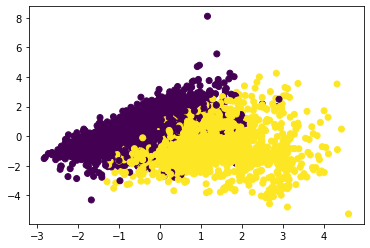

3 clusters mini-batch k-means


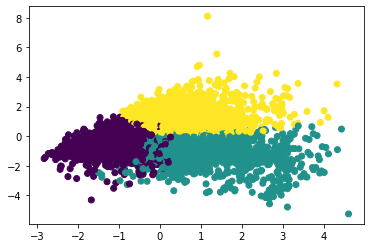

4 clusters mini-batch k-means


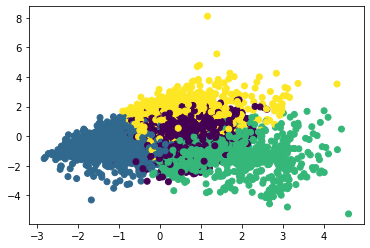

5 clusters mini-batch k-means


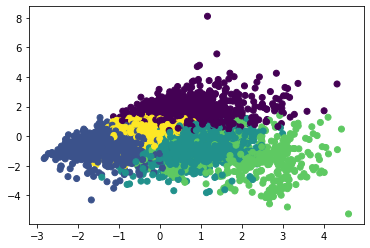

6 clusters mini-batch k-means


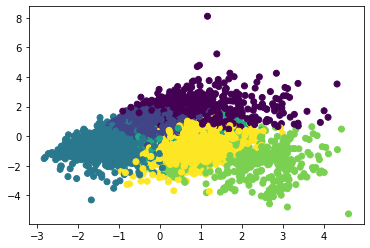

7 clusters mini-batch k-means


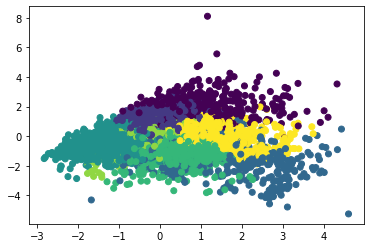

8 clusters mini-batch k-means


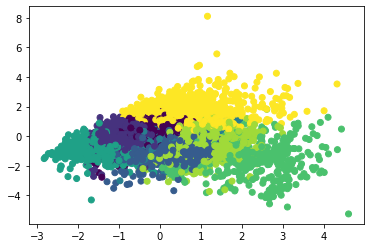

9 clusters mini-batch k-means


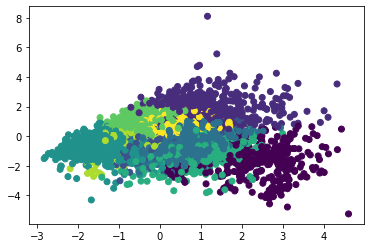

10 clusters mini-batch k-means


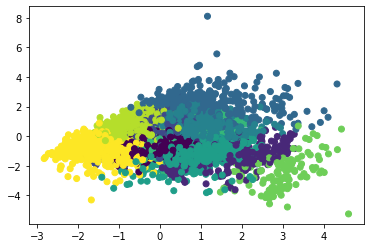

11 clusters mini-batch k-means


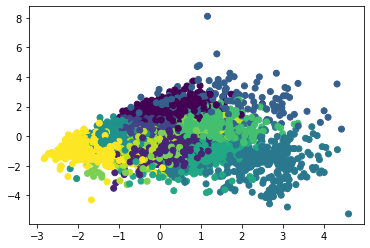

In [627]:
# Apply PCA

pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solutions

print("2 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_1)
plt.show()

print("3 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_2)
plt.show()

print("4 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_3)
plt.show()

print("5 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_4)
plt.show()

print("6 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_5)
plt.show()

print("7 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_6)
plt.show()

print("8 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_7)
plt.show()

print("9 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_8)
plt.show()

print("10 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_9)
plt.show()

print("11 clusters mini-batch k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_10)
plt.show()


We can see that Mini-Batch K-means was slightly faster than K-means and it produced similar results.

According to the results, the best solution is the Mini-Batch K-means with 5 clusters.

However, when comparing Mini-Batch K-means and K-means solutions; K-means with 2 clusters is the best solution since its silhouette score is the highest.

## Hierarchical Clustering (Agglomerative clustering)

I will apply agglomerative clustering with 2 and 3 clusters using the three different linkage methods: complete, average and ward.


## linkage="ward", affinity="euclidean"

In [628]:
# Apply agglomerative clustering and try the three linkage methods (ward, average, complete)

# Ward

# Change the value of k and evaluate the performance of the Agglomerative Clustering solution

pred_1 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=2).fit_predict(X_std)

pred_2 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=3).fit_predict(X_std)

pred_3 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=4).fit_predict(X_std)

pred_4 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=5).fit_predict(X_std)

pred_5 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=6).fit_predict(X_std)

pred_6 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=7).fit_predict(X_std)

pred_7 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=8).fit_predict(X_std)

pred_8 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=9).fit_predict(X_std)

pred_9 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=10).fit_predict(X_std)

pred_10 = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=11).fit_predict(X_std)

# Calculate the silhouette coefficient scores

print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 2 clusters: {}".format(metrics.silhouette_score(X_std, pred_1, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 3 clusters: {}".format(metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 4 clusters: {}".format(metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 5 clusters: {}".format(metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 6 clusters: {}".format(metrics.silhouette_score(X_std, pred_5, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 7 clusters: {}".format(metrics.silhouette_score(X_std, pred_6, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 8 clusters: {}".format(metrics.silhouette_score(X_std, pred_7, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 9 clusters: {}".format(metrics.silhouette_score(X_std, pred_8, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 10 clusters: {}".format(metrics.silhouette_score(X_std, pred_9, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 11 clusters: {}".format(metrics.silhouette_score(X_std, pred_10, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 2 clusters: 0.1853402409965877
The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 3 clusters: 0.204886545694457
The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 4 clusters: 0.2013599379762334
The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 5 clusters: 0.21309246156500028
The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 6 clusters: 0.23156690718327083
The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 7 clusters: 0.2513572606203704
The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 8 clusters: 0.23698190349691242
The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 9 clusters: 0.1884989497573355
The silhoutte score of the Agglomerative Clust

2 clusters Agglomerative Clustering solution (linkage method ward)


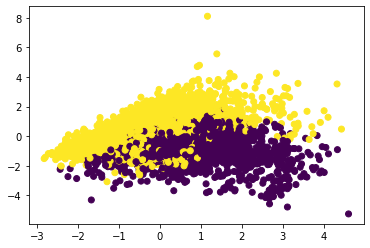

3 clusters Agglomerative Clustering solution (linkage method ward)


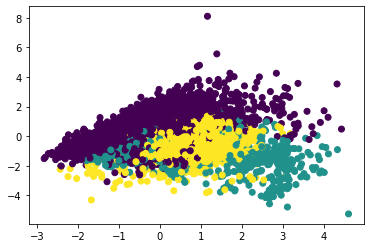

4 clusters Agglomerative Clustering solution (linkage method ward)


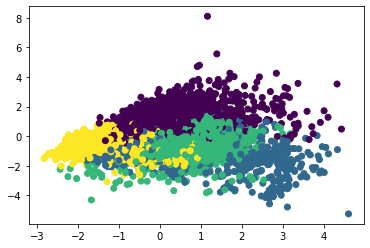

5 clusters Agglomerative Clustering solution (linkage method ward)


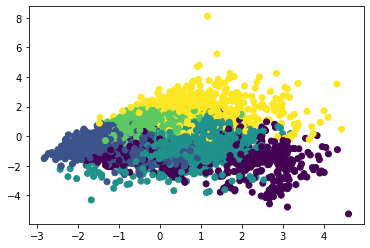

6 clusters Agglomerative Clustering solution (linkage method ward)


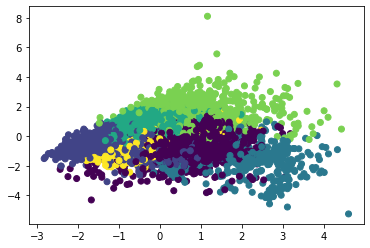

7 clusters Agglomerative Clustering solution (linkage method ward)


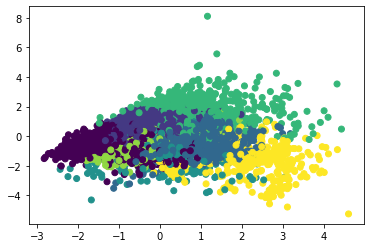

8 clusters Agglomerative Clustering solution (linkage method ward)


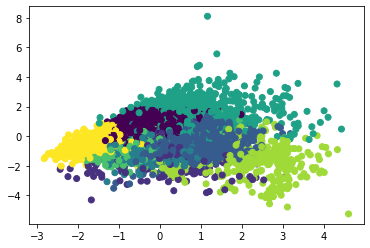

9 clusters Agglomerative Clustering solution (linkage method ward)


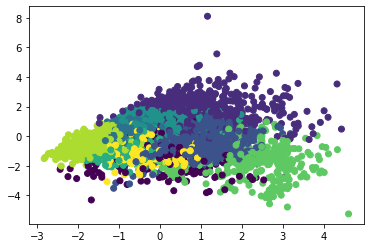

10 clusters Agglomerative Clustering solution (linkage method ward)


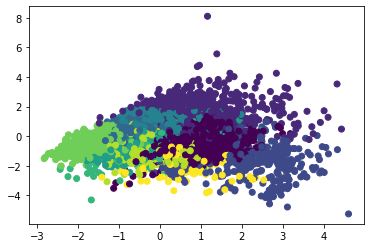

11 clusters Agglomerative Clustering solution (linkage method ward)


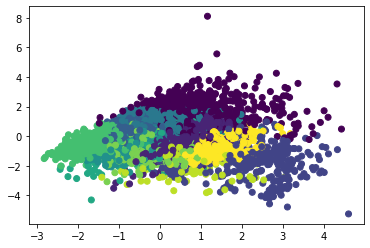

In [629]:
# Apply PCA

pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solutions

print("2 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_1)
plt.show()

print("3 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_2)
plt.show()

print("4 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_3)
plt.show()

print("5 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_4)
plt.show()

print("6 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_5)
plt.show()

print("7 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_6)
plt.show()

print("8 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_7)
plt.show()

print("9 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_8)
plt.show()

print("10 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_9)
plt.show()

print("11 clusters Agglomerative Clustering solution (linkage method ward)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_10)
plt.show()

## linkage="complete", affinity="cosine"

In [630]:
# Apply agglomerative clustering and try the three linkage methods (ward, average, complete)

# Complete

# Change the value of k and evaluate the performance of the Agglomerative Clustering solution

pred_1 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=2).fit_predict(X_std)

pred_2 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=3).fit_predict(X_std)

pred_3 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=4).fit_predict(X_std)

pred_4 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=5).fit_predict(X_std)

pred_5 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=6).fit_predict(X_std)

pred_6 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=7).fit_predict(X_std)

pred_7 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=8).fit_predict(X_std)

pred_8 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=9).fit_predict(X_std)

pred_9 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=10).fit_predict(X_std)

pred_10 = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=11).fit_predict(X_std)

# Calculate the silhouette coefficient scores

print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 2 clusters: {}".format(metrics.silhouette_score(X_std, pred_1, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 3 clusters: {}".format(metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 4 clusters: {}".format(metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 5 clusters: {}".format(metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 6 clusters: {}".format(metrics.silhouette_score(X_std, pred_5, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 7 clusters: {}".format(metrics.silhouette_score(X_std, pred_6, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 8 clusters: {}".format(metrics.silhouette_score(X_std, pred_7, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 9 clusters: {}".format(metrics.silhouette_score(X_std, pred_8, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 10 clusters: {}".format(metrics.silhouette_score(X_std, pred_9, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 11 clusters: {}".format(metrics.silhouette_score(X_std, pred_10, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 2 clusters: 0.27097506217786915
The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 3 clusters: 0.1462385442276756
The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 4 clusters: 0.13873412053341927
The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 5 clusters: 0.14310068048323005
The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 6 clusters: 0.152346788991343
The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 7 clusters: 0.1082306507487574
The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 8 clusters: 0.1446797127419991
The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 9 clusters: 0.12796957489360725
The silhoutte

2 clusters Agglomerative Clustering solution (linkage method complete)


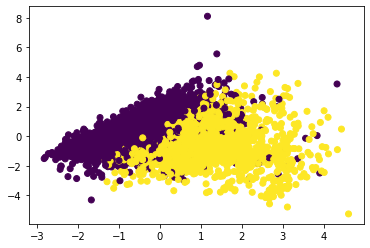

3 clusters Agglomerative Clustering solution (linkage method complete)


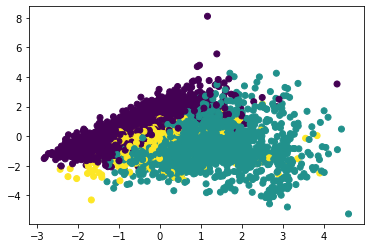

4 clusters Agglomerative Clustering solution (linkage method complete)


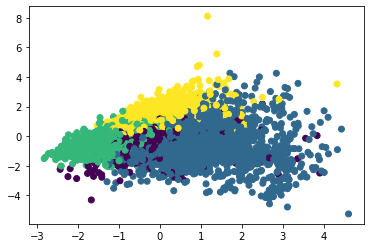

5 clusters Agglomerative Clustering solution (linkage method complete)


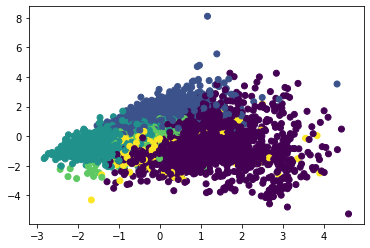

6 clusters Agglomerative Clustering solution (linkage method complete)


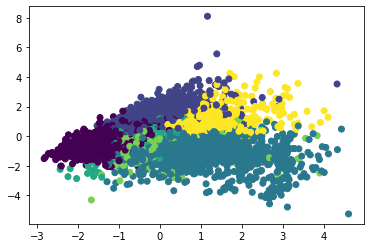

7 clusters Agglomerative Clustering solution (linkage method complete)


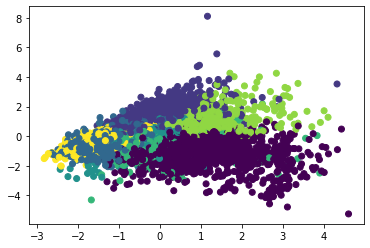

8 clusters Agglomerative Clustering solution (linkage method complete)


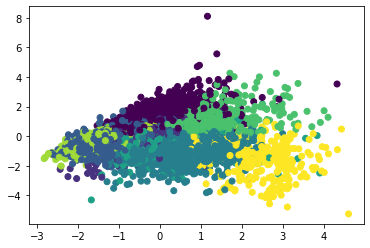

9 clusters Agglomerative Clustering solution (linkage method complete)


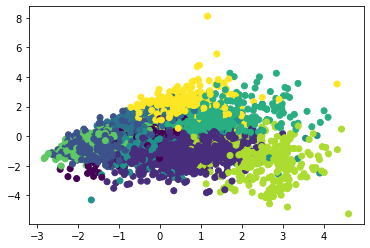

10 clusters Agglomerative Clustering solution (linkage method complete)


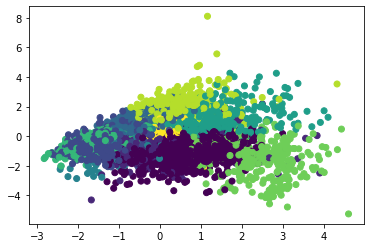

11 clusters Agglomerative Clustering solution (linkage method complete)


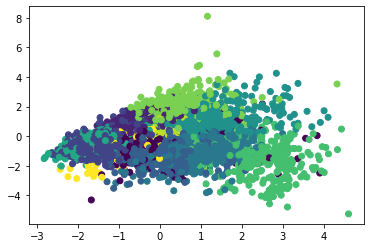

In [631]:
# Apply PCA

pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solutions

print("2 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_1)
plt.show()

print("3 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_2)
plt.show()

print("4 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_3)
plt.show()

print("5 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_4)
plt.show()

print("6 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_5)
plt.show()

print("7 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_6)
plt.show()

print("8 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_7)
plt.show()

print("9 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_8)
plt.show()

print("10 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_9)
plt.show()

print("11 clusters Agglomerative Clustering solution (linkage method complete)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_10)
plt.show()

## linkage="average", affinity="cosine"

In [632]:
# Apply agglomerative clustering and try the three linkage methods (ward, average, complete)

# Average

# Change the value of k and evaluate the performance of the Agglomerative Clustering solution

pred_1 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=2).fit_predict(X_std)

pred_2 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=3).fit_predict(X_std)

pred_3 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=4).fit_predict(X_std)

pred_4 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=5).fit_predict(X_std)

pred_5 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=6).fit_predict(X_std)

pred_6 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=7).fit_predict(X_std)

pred_7 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=8).fit_predict(X_std)

pred_8 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=9).fit_predict(X_std)

pred_9 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=10).fit_predict(X_std)

pred_10 = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=11).fit_predict(X_std)

# Calculate the silhouette coefficient scores

print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 2 clusters: {}".format(metrics.silhouette_score(X_std, pred_1, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 3 clusters: {}".format(metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 4 clusters: {}".format(metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 5 clusters: {}".format(metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 6 clusters: {}".format(metrics.silhouette_score(X_std, pred_5, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 7 clusters: {}".format(metrics.silhouette_score(X_std, pred_6, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 8 clusters: {}".format(metrics.silhouette_score(X_std, pred_7, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 9 clusters: {}".format(metrics.silhouette_score(X_std, pred_8, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 10 clusters: {}".format(metrics.silhouette_score(X_std, pred_9, metric='euclidean')))
print("The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 11 clusters: {}".format(metrics.silhouette_score(X_std, pred_10, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 2 clusters: 0.19722739546621357
The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 3 clusters: 0.23030160194368945
The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 4 clusters: 0.2043761682542433
The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 5 clusters: 0.22473946800285205
The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 6 clusters: 0.20052337374609294
The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 7 clusters: 0.19748462218630367
The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 8 clusters: 0.19211747475194407
The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 9 clusters: 0.16546563117058669
The silhoutte sco

2 clusters Agglomerative Clustering solution (linkage method average)


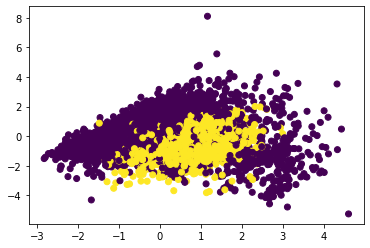

3 clusters Agglomerative Clustering solution (linkage method average)


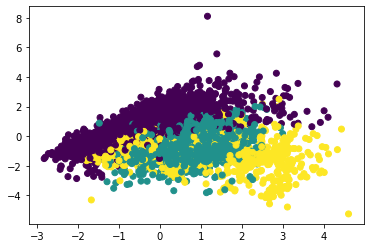

4 clusters Agglomerative Clustering solution (linkage method average)


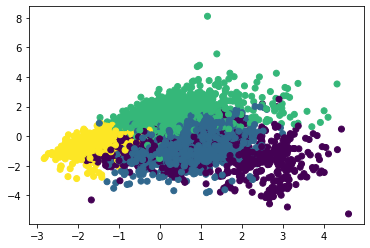

5 clusters Agglomerative Clustering solution (linkage method average)


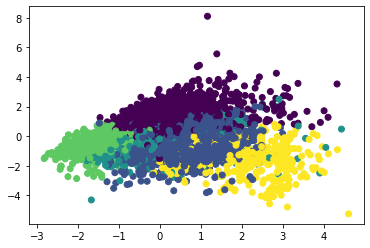

6 clusters Agglomerative Clustering solution (linkage method average)


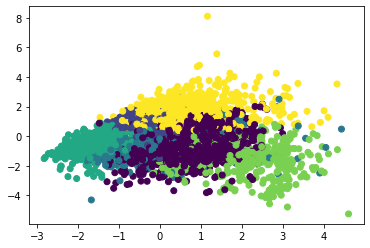

7 clusters Agglomerative Clustering solution (linkage method average)


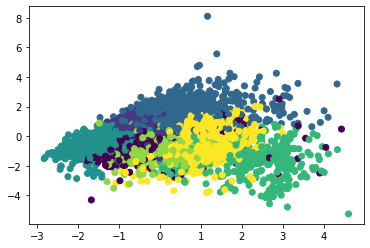

8 clusters Agglomerative Clustering solution (linkage method average)


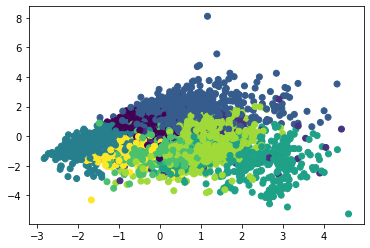

9 clusters Agglomerative Clustering solution (linkage method average)


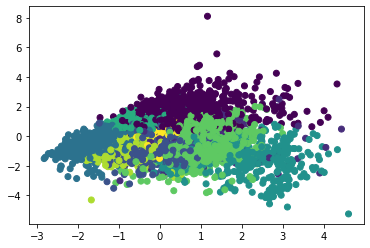

10 clusters Agglomerative Clustering solution (linkage method average)


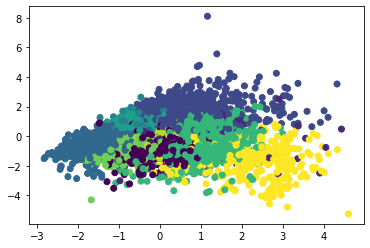

11 clusters Agglomerative Clustering solution (linkage method average)


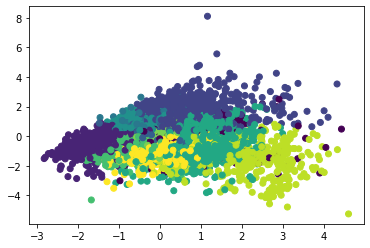

In [633]:
# Apply PCA

pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solutions

print("2 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_1)
plt.show()

print("3 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_2)
plt.show()

print("4 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_3)
plt.show()

print("5 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_4)
plt.show()

print("6 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_5)
plt.show()

print("7 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_6)
plt.show()

print("8 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_7)
plt.show()

print("9 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_8)
plt.show()

print("10 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_9)
plt.show()

print("11 clusters Agglomerative Clustering solution (linkage method average)")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_10)
plt.show()


According to the results, the linkage method ward with 2 clusters is the best model in terms of silhouette score.

Furthermore, when comparing the linkage method ward solution with the K-means and Mini-Batch K-means solutions; K-means with 2 clusters performs better and thus is the best model.

## DBSCAN (density-based spatial clustering of applications with noise)

When applying DBSCAN, since we know from the previous models results that the solutions with 2 clusters are the best ones, I will try other eps and min_samples values to find for the best solution based on the number of clusters DBSCAN identifies.

In [634]:
# Set eps=1 and min_samples=1 then increase the value of min_samples

# Defining the agglomerative clustering

dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model

clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,101,5)

for i in range(2,101,5):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 28
Number of clusters when min_samples=2 is: 5
Number of clusters when min_samples=7 is: 3
Number of clusters when min_samples=12 is: 3
Number of clusters when min_samples=17 is: 3
Number of clusters when min_samples=22 is: 3
Number of clusters when min_samples=27 is: 3
Number of clusters when min_samples=32 is: 3
Number of clusters when min_samples=37 is: 4
Number of clusters when min_samples=42 is: 3
Number of clusters when min_samples=47 is: 3
Number of clusters when min_samples=52 is: 3
Number of clusters when min_samples=57 is: 3
Number of clusters when min_samples=62 is: 3
Number of clusters when min_samples=67 is: 3
Number of clusters when min_samples=72 is: 3
Number of clusters when min_samples=77 is: 3
Number of clusters when min_samples=82 is: 3
Number of clusters when min_samples=87 is: 3
Number of clusters when min_samples=92 is: 3
Number of clusters when min_samples=97 is: 3


In [635]:
# Set eps=1 and min_samples=1 then increase the value of eps

# Defining the agglomerative clustering

dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model

clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,0.5, 0.6, 0.7, 0.8]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 28
Number of clusters when eps=0.01 is: 7092
Number of clusters when eps=0.1 is: 5232
Number of clusters when eps=0.5 is: 293
Number of clusters when eps=0.6 is: 181
Number of clusters when eps=0.7 is: 106
Number of clusters when eps=0.8 is: 69


Number of clusters seems to decrease as epsilon increases; and increases as min_samples increases.

Furthermore, DBSCAN identifies 2 clusters when min_samples=27 and eps=0.6.

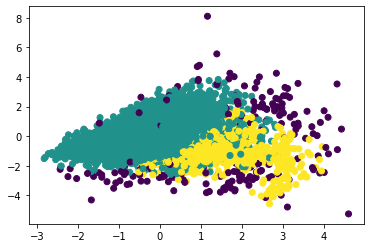

The silhoutte score of the DBSCAN solution (eps=1, min_samples=27): 0.310542766408641


In [636]:
# Defining the agglomerative clustering

dbscan_cluster = DBSCAN(eps=1, min_samples=27, metric="euclidean")

# Fit model

clusters = dbscan_cluster.fit_predict(X_std)

# Apply PCA

X_pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solution

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.show()

print("The silhoutte score of the DBSCAN solution (eps=1, min_samples=27): {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

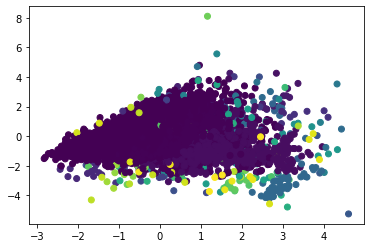

The silhoutte score of the DBSCAN solution (eps=0.6, min_samples=1): -0.12063259278819267


In [637]:
# Defining the agglomerative clustering

dbscan_cluster = DBSCAN(eps=0.6, min_samples=1, metric="euclidean")

# Fit model

clusters = dbscan_cluster.fit_predict(X_std)

# Apply PCA

X_pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solution

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.show()

print("The silhoutte score of the DBSCAN solution (eps=0.6, min_samples=1): {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

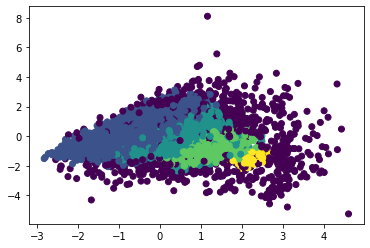

The silhoutte score of the DBSCAN solution (eps=0.6, min_samples=27): 0.13678108305763503


In [638]:
# Defining the agglomerative clustering

dbscan_cluster = DBSCAN(eps=0.6, min_samples=27, metric="euclidean")

# Fit model

clusters = dbscan_cluster.fit_predict(X_std)

# Apply PCA

X_pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solution

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.show()

print("The silhoutte score of the DBSCAN solution (eps=0.6, min_samples=27): {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN performs worse than k-means, mini-batch k-means and hierarchical clustering. Its silhoutte score is the lowest one (closest to -1) which indicates very bad clusters. Likewise, it could not distinguish between the two clusters clearly as the previous models did.

## Gaussian mixture model (GMM)

In [639]:

# Change the number of mixture components (n_components) and evaluate the performance of the Agglomerative Clustering solution

#pred_1 = GaussianMixture(n_components=1, random_state=123).fit_predict(X_std)

pred_2 = GaussianMixture(n_components=2, random_state=123).fit_predict(X_std)

pred_3 = GaussianMixture(n_components=3, random_state=123).fit_predict(X_std)

pred_4 = GaussianMixture(n_components=4, random_state=123).fit_predict(X_std)

pred_5 = GaussianMixture(n_components=5, random_state=123).fit_predict(X_std)

pred_6 = GaussianMixture(n_components=6, random_state=123).fit_predict(X_std)

pred_7 = GaussianMixture(n_components=7, random_state=123).fit_predict(X_std)

pred_8 = GaussianMixture(n_components=8, random_state=123).fit_predict(X_std)

pred_9 = GaussianMixture(n_components=9, random_state=123).fit_predict(X_std)

pred_10 = GaussianMixture(n_components=10, random_state=123).fit_predict(X_std)

# Calculate the silhouette coefficient scores

#print("The silhoutte score of the GMM solution with n_components=1: {}".format(metrics.silhouette_score(X_std, pred_1, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=2: {}".format(metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=3: {}".format(metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=4: {}".format(metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=5: {}".format(metrics.silhouette_score(X_std, pred_5, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=6: {}".format(metrics.silhouette_score(X_std, pred_6, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=7: {}".format(metrics.silhouette_score(X_std, pred_7, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=8: {}".format(metrics.silhouette_score(X_std, pred_8, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=9: {}".format(metrics.silhouette_score(X_std, pred_9, metric='euclidean')))
print("The silhoutte score of the GMM solution with n_components=10: {}".format(metrics.silhouette_score(X_std, pred_10, metric='euclidean')))

The silhoutte score of the GMM solution with n_components=2: 0.17179853233954606
The silhoutte score of the GMM solution with n_components=3: 0.1672994524114527
The silhoutte score of the GMM solution with n_components=4: 0.08691370355073354
The silhoutte score of the GMM solution with n_components=5: 0.0911789109186983
The silhoutte score of the GMM solution with n_components=6: 0.014453188009095595
The silhoutte score of the GMM solution with n_components=7: 0.029788806994262916
The silhoutte score of the GMM solution with n_components=8: -0.003774556925843789
The silhoutte score of the GMM solution with n_components=9: 0.018921733180048878
The silhoutte score of the GMM solution with n_components=10: -0.0254141913712993


According to the results, the GMM solution with n_components=2 is the best solution in terms of silhouette score. However, it doesn't perform better than K-means, Mini-Batch K-means, and Hierarchical Clustering with linkage method ward.

GMM solution with n_components=2


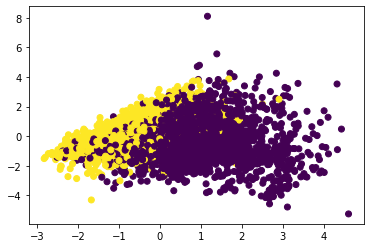

GMM solution with n_components=3


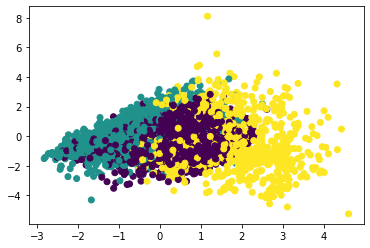

GMM solution with n_components=4


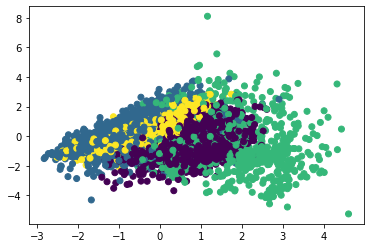

GMM solution with n_components=5


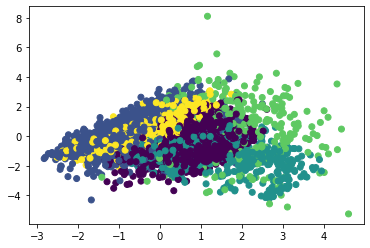

GMM solution with n_components=6


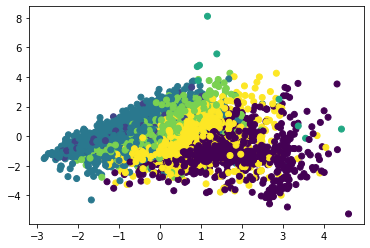

GMM solution with n_components=7


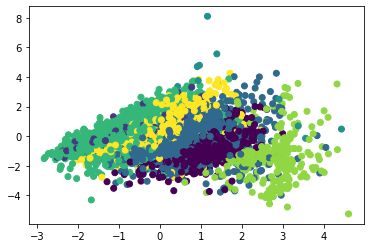

GMM solution with n_components=8


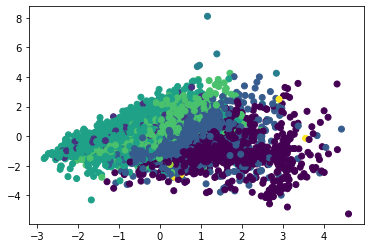

GMM solution with n_components=9


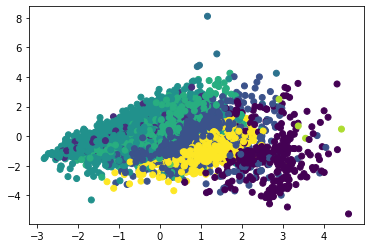

GMM solution with n_components=10


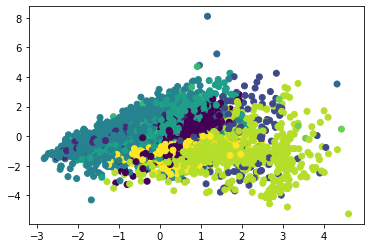

In [640]:
# Apply PCA

pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solutions

#print("2 clusters Agglomerative Clustering solution (linkage method average)")
#plt.scatter(pca[:, 0], pca[:, 1], c=pred_1)
#plt.show()

print("GMM solution with n_components=2")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_2)
plt.show()

print("GMM solution with n_components=3")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_3)
plt.show()

print("GMM solution with n_components=4")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_4)
plt.show()

print("GMM solution with n_components=5")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_5)
plt.show()

print("GMM solution with n_components=6")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_6)
plt.show()

print("GMM solution with n_components=7")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_7)
plt.show()

print("GMM solution with n_components=8")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_8)
plt.show()

print("GMM solution with n_components=9")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_9)
plt.show()

print("GMM solution with n_components=10")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_10)
plt.show()

I will update the covariance_type parameter of the GMM with n_components=2 to improve the model.

In [641]:
# Try the four types of covariance parameter (full, tied, diag, and spherical) and evaluate the performance of the Agglomerative Clustering solution

pred_2 = GaussianMixture(n_components=2, random_state=123, covariance_type="full").fit_predict(X_std)

pred_3 = GaussianMixture(n_components=2, random_state=123, covariance_type="tied").fit_predict(X_std)

pred_4 = GaussianMixture(n_components=2, random_state=123, covariance_type="diag").fit_predict(X_std)

pred_5 = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical").fit_predict(X_std)

# Calculate the silhouette coefficient scores

print("The silhoutte score of the GMM solution with covariance_type=full: {}".format(metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("The silhoutte score of the GMM solution with covariance_type=tied: {}".format(metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("The silhoutte score of the GMM solution with covariance_type=diag: {}".format(metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("The silhoutte score of the GMM solution with covariance_type=spherical: {}".format(metrics.silhouette_score(X_std, pred_5, metric='euclidean')))

The silhoutte score of the GMM solution with covariance_type=full: 0.17179853233954606
The silhoutte score of the GMM solution with covariance_type=tied: 0.28562811814254757
The silhoutte score of the GMM solution with covariance_type=diag: 0.17174678077542646
The silhoutte score of the GMM solution with covariance_type=spherical: 0.1638592696523031


GMM solution with covariance_type=full


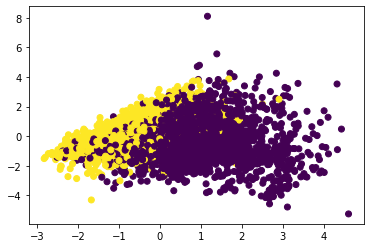

GMM solution with covariance_type=tied


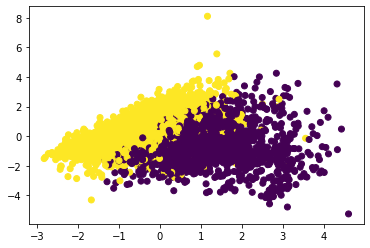

GMM solution with covariance_type=diag


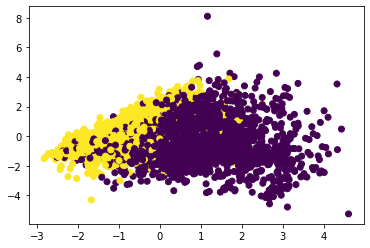

GMM solution with covariance_type=spherical


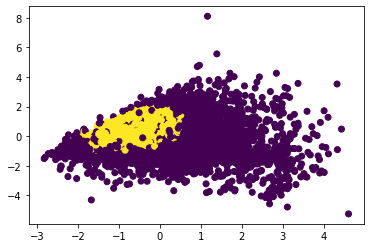

In [642]:
# Apply PCA

pca = PCA(n_components=3).fit_transform(X_std)

# Plot the solutions

print("GMM solution with covariance_type=full")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_2)
plt.show()

print("GMM solution with covariance_type=tied")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_3)
plt.show()

print("GMM solution with covariance_type=diag")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_4)
plt.show()

print("GMM solution with covariance_type=spherical")
plt.scatter(pca[:, 0], pca[:, 1], c=pred_5)
plt.show()

# 4. Results

### K-means

Silhouette score for 2 clusters k-means: 0.2853896667986714

Silhouette score for 7 clusters k-means: 0.29213892351848963
### Mini-Batch K-means

Silhouette score for 4 clusters mini-batch k-means: 0.25758017814816336

Silhouette score for 5 clusters mini-batch k-means: 0.2576377596103463

### Hierarchical Clustering

linkage="ward", affinity="euclidean"

The silhoutte score of the Agglomerative Clustering solution (linkage method ward) with 7 clusters: 0.2513572606203704

linkage="complete", affinity="cosine"

The silhoutte score of the Agglomerative Clustering solution (linkage method complete) with 2 clusters: 0.27097506217786915

linkage="average", affinity="cosine"

The silhoutte score of the Agglomerative Clustering solution (linkage method average) with 3 clusters: 0.23030160194368945

### DBSCAN

The silhoutte score of the DBSCAN solution (eps=1, min_samples=27): 0.310542766408641

The silhoutte score of the DBSCAN solution (eps=0.6, min_samples=1): -0.12063259278819267

The silhoutte score of the DBSCAN solution (eps=0.6, min_samples=27): 0.13678108305763503

### GMM

The silhoutte score of the GMM solution with n_components=2: 0.17179853233954606

The silhoutte score of the GMM solution with covariance_type=full: 0.17179853233954606

The silhoutte score of the GMM solution with covariance_type=tied: 0.28562811814254757

The silhoutte score of the GMM solution with covariance_type=diag: 0.17174678077542646

The silhoutte score of the GMM solution with covariance_type=spherical: 0.1638592696523031

